In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer, PowerTransformer

# ML (train_test) with DWT

In [ ]:
ds = pd.read_csv("modified_file_DWT_15features.csv")

# Shuffle and one-hot encode
ds = shuffle(ds, random_state=42)
ds = pd.get_dummies(ds, columns=['Channel'], dtype=int)

# Extract labels and features
label = ds['Label']
features = ds.drop(columns=['Label'])
ds_final = pd.concat([features, label], axis=1)
ds_final.dropna(inplace=True)

# Split features and labels
X = ds_final.drop(columns=['Label'])
y = ds_final['Label']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "AdaBoost": AdaBoostClassifier(n_estimators=100)}

# List of scalers
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler(),
    "QuantileTransformer": QuantileTransformer(),
    "PowerTransformer": PowerTransformer()
}

# Loop through each scaler
for scaler_name, scaler in scalers.items():
    print(f"\nScaler: {scaler_name}")
    print("=" * 40)

    # Apply the scaler using a pipeline for each model
    for model_name, model in models.items():
        pipeline = Pipeline([
            ("scaler", scaler),
            ("classifier", model)
        ])

        # Fit and predict
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        # Evaluate the model
        report = classification_report(y_test, y_pred)
        print(f"{model_name} with {scaler_name}:")
        print(report)
        print("-" * 40)


Scaler: MinMaxScaler
Logistic Regression with MinMaxScaler:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        63
           1       0.74      0.73      0.74        44

    accuracy                           0.79       107
   macro avg       0.78      0.78      0.78       107
weighted avg       0.78      0.79      0.78       107

----------------------------------------
KNN with MinMaxScaler:
              precision    recall  f1-score   support

           0       0.59      0.67      0.63        63
           1       0.42      0.34      0.38        44

    accuracy                           0.53       107
   macro avg       0.50      0.50      0.50       107
weighted avg       0.52      0.53      0.52       107

----------------------------------------
Naive Bayes with MinMaxScaler:
              precision    recall  f1-score   support

           0       0.67      0.95      0.79        63
           1       0.83      0.34      0

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:00:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost with MinMaxScaler:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.95      0.95      0.95        44

    accuracy                           0.96       107
   macro avg       0.96      0.96      0.96       107
weighted avg       0.96      0.96      0.96       107

----------------------------------------
AdaBoost with MinMaxScaler:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.95      0.93      0.94        44

    accuracy                           0.95       107
   macro avg       0.95      0.95      0.95       107
weighted avg       0.95      0.95      0.95       107

----------------------------------------

Scaler: StandardScaler
Logistic Regression with StandardScaler:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        63
           1       0.78      0.73  

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:00:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost with StandardScaler:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.95      0.95      0.95        44

    accuracy                           0.96       107
   macro avg       0.96      0.96      0.96       107
weighted avg       0.96      0.96      0.96       107

----------------------------------------
AdaBoost with StandardScaler:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.95      0.93      0.94        44

    accuracy                           0.95       107
   macro avg       0.95      0.95      0.95       107
weighted avg       0.95      0.95      0.95       107

----------------------------------------

Scaler: RobustScaler
Logistic Regression with RobustScaler:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        63
           1       0.79      0.77  

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Naive Bayes with RobustScaler:
              precision    recall  f1-score   support

           0       0.67      0.95      0.79        63
           1       0.83      0.34      0.48        44

    accuracy                           0.70       107
   macro avg       0.75      0.65      0.64       107
weighted avg       0.74      0.70      0.66       107

----------------------------------------
Decision Tree with RobustScaler:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        63
           1       0.82      0.93      0.87        44

    accuracy                           0.89       107
   macro avg       0.88      0.89      0.89       107
weighted avg       0.89      0.89      0.89       107

----------------------------------------
Random Forest with RobustScaler:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        63
           1       0.98      0.93      0.95        44

   

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:00:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost with RobustScaler:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.95      0.95      0.95        44

    accuracy                           0.96       107
   macro avg       0.96      0.96      0.96       107
weighted avg       0.96      0.96      0.96       107

----------------------------------------
AdaBoost with RobustScaler:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.95      0.93      0.94        44

    accuracy                           0.95       107
   macro avg       0.95      0.95      0.95       107
weighted avg       0.95      0.95      0.95       107

----------------------------------------

Scaler: QuantileTransformer
Logistic Regression with QuantileTransformer:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82        63
           1       0.73  

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (425). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (425). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (425). n_quantiles is set to n_samples.
  warnings.warn(


Naive Bayes with QuantileTransformer:
              precision    recall  f1-score   support

           0       0.64      0.59      0.61        63
           1       0.47      0.52      0.49        44

    accuracy                           0.56       107
   macro avg       0.55      0.56      0.55       107
weighted avg       0.57      0.56      0.56       107

----------------------------------------
Decision Tree with QuantileTransformer:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88        63
           1       0.80      0.91      0.85        44

    accuracy                           0.87       107
   macro avg       0.86      0.88      0.87       107
weighted avg       0.88      0.87      0.87       107

----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (425). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (425). n_quantiles is set to n_samples.
  warnings.warn(


Random Forest with QuantileTransformer:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        63
           1       0.98      0.93      0.95        44

    accuracy                           0.96       107
   macro avg       0.97      0.96      0.96       107
weighted avg       0.96      0.96      0.96       107

----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (425). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:00:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost with QuantileTransformer:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.95      0.95      0.95        44

    accuracy                           0.96       107
   macro avg       0.96      0.96      0.96       107
weighted avg       0.96      0.96      0.96       107

----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (425). n_quantiles is set to n_samples.
  warnings.warn(


AdaBoost with QuantileTransformer:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.95      0.93      0.94        44

    accuracy                           0.95       107
   macro avg       0.95      0.95      0.95       107
weighted avg       0.95      0.95      0.95       107

----------------------------------------

Scaler: PowerTransformer
Logistic Regression with PowerTransformer:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        63
           1       0.79      0.86      0.83        44

    accuracy                           0.85       107
   macro avg       0.84      0.85      0.85       107
weighted avg       0.85      0.85      0.85       107

----------------------------------------
KNN with PowerTransformer:
              precision    recall  f1-score   support

           0       0.71      0.73      0.72        63
           1       0.60 

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:00:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost with PowerTransformer:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.95      0.95      0.95        44

    accuracy                           0.96       107
   macro avg       0.96      0.96      0.96       107
weighted avg       0.96      0.96      0.96       107

----------------------------------------
AdaBoost with PowerTransformer:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.95      0.93      0.94        44

    accuracy                           0.95       107
   macro avg       0.95      0.95      0.95       107
weighted avg       0.95      0.95      0.95       107

----------------------------------------


## ML with WPD (train test)

In [ ]:
ds = pd.read_csv("modified_file_WPD_15features.csv")

# Shuffle and one-hot encode
ds = shuffle(ds, random_state=42)
ds = pd.get_dummies(ds, columns=['Channel'], dtype=int)

# Extract labels and features
label = ds['Label']
features = ds.drop(columns=['Label'])
ds_final = pd.concat([features, label], axis=1)
ds_final.dropna(inplace=True)

# Split features and labels
X = ds_final.drop(columns=['Label'])
y = ds_final['Label']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "AdaBoost": AdaBoostClassifier(n_estimators=100)}

# List of scalers
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler(),
    "QuantileTransformer": QuantileTransformer(),
    "PowerTransformer": PowerTransformer()
}

# Loop through each scaler
for scaler_name, scaler in scalers.items():
    print(f"\nScaler: {scaler_name}")
    print("=" * 40)

    # Apply the scaler using a pipeline for each model
    for model_name, model in models.items():
        pipeline = Pipeline([
            ("scaler", scaler),
            ("classifier", model)
        ])

        # Fit and predict
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        # Evaluate the model
        report = classification_report(y_test, y_pred)
        print(f"{model_name} with {scaler_name}:")
        print(report)
        print("-" * 40)


Scaler: MinMaxScaler
Logistic Regression with MinMaxScaler:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        63
           1       0.82      0.75      0.79        44

    accuracy                           0.83       107
   macro avg       0.83      0.82      0.82       107
weighted avg       0.83      0.83      0.83       107

----------------------------------------
KNN with MinMaxScaler:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73        63
           1       0.61      0.57      0.59        44

    accuracy                           0.67       107
   macro avg       0.66      0.66      0.66       107
weighted avg       0.67      0.67      0.67       107

----------------------------------------
Naive Bayes with MinMaxScaler:
              precision    recall  f1-score   support

           0       0.67      0.98      0.80        63
           1       0.93      0.32      0

## ML with CWT (train_test_split)

In [ ]:
ds = pd.read_csv("modified_file_CWT_15features.csv")

# remove zero-valued features:

droplist = [f"Scale{i}_ZCR" for i in range(1, 33)]
droplist = [col for col in droplist if col in ds.columns]
ds.drop(columns=droplist, inplace=True)

# Shuffle and one-hot encode
ds = shuffle(ds, random_state=42)
ds = pd.get_dummies(ds, columns=['Channel'], dtype=int)

# Extract labels and features
label = ds['Label']
features = ds.drop(columns=['Label'])
ds_final = pd.concat([features, label], axis=1)
ds_final.dropna(inplace=True)

# Split features and labels
X = ds_final.drop(columns=['Label'])
y = ds_final['Label']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "AdaBoost": AdaBoostClassifier(n_estimators=100)}

# List of scalers
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler(),
    "QuantileTransformer": QuantileTransformer(),
    "PowerTransformer": PowerTransformer()
}

# Loop through each scaler
for scaler_name, scaler in scalers.items():
    print(f"\nScaler: {scaler_name}")
    print("=" * 40)

    # Apply the scaler using a pipeline for each model
    for model_name, model in models.items():
        pipeline = Pipeline([
            ("scaler", scaler),
            ("classifier", model)
        ])

        # Fit and predict
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        # Evaluate the model
        report = classification_report(y_test, y_pred)
        print(f"{model_name} with {scaler_name}:")
        print(report)
        print("-" * 40)


Scaler: MinMaxScaler
Logistic Regression with MinMaxScaler:
              precision    recall  f1-score   support

           0       0.77      0.76      0.77        63
           1       0.67      0.68      0.67        44

    accuracy                           0.73       107
   macro avg       0.72      0.72      0.72       107
weighted avg       0.73      0.73      0.73       107

----------------------------------------
KNN with MinMaxScaler:
              precision    recall  f1-score   support

           0       0.79      0.70      0.74        63
           1       0.63      0.73      0.67        44

    accuracy                           0.71       107
   macro avg       0.71      0.71      0.71       107
weighted avg       0.72      0.71      0.71       107

----------------------------------------
Naive Bayes with MinMaxScaler:
              precision    recall  f1-score   support

           0       0.60      0.97      0.74        63
           1       0.60      0.07      0

## ML WITH FFT (train_test_split)

In [ ]:
ds = pd.read_csv("modified_file_FFT_15features.csv")

# Shuffle and one-hot encode
ds = shuffle(ds, random_state=42)
ds = pd.get_dummies(ds, columns=['Channel'], dtype=int)

# Extract labels and features
label = ds['Label']
features = ds.drop(columns=['Label'])
ds_final = pd.concat([features, label], axis=1)
ds_final.dropna(inplace=True)

# Split features and labels
X = ds_final.drop(columns=['Label'])
y = ds_final['Label']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "AdaBoost": AdaBoostClassifier(n_estimators=100)}

# List of scalers
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler(),
    "QuantileTransformer": QuantileTransformer(),
    "PowerTransformer": PowerTransformer()
}

# Loop through each scaler
for scaler_name, scaler in scalers.items():
    print(f"\nScaler: {scaler_name}")
    print("=" * 40)

    # Apply the scaler using a pipeline for each model
    for model_name, model in models.items():
        pipeline = Pipeline([
            ("scaler", scaler),
            ("classifier", model)
        ])

        # Fit and predict
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        # Evaluate the model
        report = classification_report(y_test, y_pred)
        print(f"{model_name} with {scaler_name}:")
        print(report)
        print("-" * 40)


Scaler: MinMaxScaler
Logistic Regression with MinMaxScaler:
              precision    recall  f1-score   support

           0       0.70      0.63      0.67        63
           1       0.54      0.61      0.57        44

    accuracy                           0.63       107
   macro avg       0.62      0.62      0.62       107
weighted avg       0.64      0.63      0.63       107

----------------------------------------
KNN with MinMaxScaler:
              precision    recall  f1-score   support

           0       0.57      0.62      0.59        63
           1       0.37      0.32      0.34        44

    accuracy                           0.50       107
   macro avg       0.47      0.47      0.47       107
weighted avg       0.48      0.50      0.49       107

----------------------------------------
Naive Bayes with MinMaxScaler:
              precision    recall  f1-score   support

           0       0.63      0.94      0.75        63
           1       0.69      0.20      0

## ML with HT (train_test_split)

In [ ]:
ds = pd.read_csv("modified_file_HT_15features.csv")

# Shuffle and one-hot encode
ds = shuffle(ds, random_state=42)
ds = pd.get_dummies(ds, columns=['Channel'], dtype=int)

# Extract labels and features
label = ds['Label']
features = ds.drop(columns=['Label'])
ds_final = pd.concat([features, label], axis=1)
ds_final.dropna(inplace=True)

# Split features and labels
X = ds_final.drop(columns=['Label'])
y = ds_final['Label']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "AdaBoost": AdaBoostClassifier(n_estimators=100)}

# List of scalers
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler(),
    "QuantileTransformer": QuantileTransformer(),
    "PowerTransformer": PowerTransformer()
}

# Loop through each scaler
for scaler_name, scaler in scalers.items():
    print(f"\nScaler: {scaler_name}")
    print("=" * 40)

    # Apply the scaler using a pipeline for each model
    for model_name, model in models.items():
        pipeline = Pipeline([
            ("scaler", scaler),
            ("classifier", model)
        ])

        # Fit and predict
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        # Evaluate the model
        report = classification_report(y_test, y_pred)
        print(f"{model_name} with {scaler_name}:")
        print(report)
        print("-" * 40)


Scaler: MinMaxScaler
Logistic Regression with MinMaxScaler:
              precision    recall  f1-score   support

           0       0.71      0.67      0.69        63
           1       0.56      0.61      0.59        44

    accuracy                           0.64       107
   macro avg       0.64      0.64      0.64       107
weighted avg       0.65      0.64      0.65       107

----------------------------------------
KNN with MinMaxScaler:
              precision    recall  f1-score   support

           0       0.52      0.51      0.52        63
           1       0.33      0.34      0.33        44

    accuracy                           0.44       107
   macro avg       0.43      0.42      0.42       107
weighted avg       0.44      0.44      0.44       107

----------------------------------------
Naive Bayes with MinMaxScaler:
              precision    recall  f1-score   support

           0       0.62      0.89      0.73        63
           1       0.56      0.20      0

## ML with EMD (train_test_split)

In [ ]:
ds = pd.read_csv("modified_file_EMD_15features.csv")

# Shuffle and one-hot encode
ds = shuffle(ds, random_state=42)
ds = pd.get_dummies(ds, columns=['Channel'], dtype=int)

# Extract labels and features
label = ds['Label']
features = ds.drop(columns=['Label'])
ds_final = pd.concat([features, label], axis=1)
ds_final.dropna(inplace=True)

# Split features and labels
X = ds_final.drop(columns=['Label'])
y = ds_final['Label']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "AdaBoost": AdaBoostClassifier(n_estimators=100)}

# List of scalers
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler(),
    "QuantileTransformer": QuantileTransformer(),
    "PowerTransformer": PowerTransformer()
}

# Loop through each scaler
for scaler_name, scaler in scalers.items():
    print(f"\nScaler: {scaler_name}")
    print("=" * 40)

    # Apply the scaler using a pipeline for each model
    for model_name, model in models.items():
        pipeline = Pipeline([
            ("scaler", scaler),
            ("classifier", model)
        ])

        # Fit and predict
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        # Evaluate the model
        report = classification_report(y_test, y_pred)
        print(f"{model_name} with {scaler_name}:")
        print(report)
        print("-" * 40)


Scaler: MinMaxScaler
Logistic Regression with MinMaxScaler:
              precision    recall  f1-score   support

           0       0.65      0.59      0.62        63
           1       0.48      0.55      0.51        44

    accuracy                           0.57       107
   macro avg       0.56      0.57      0.56       107
weighted avg       0.58      0.57      0.57       107

----------------------------------------
KNN with MinMaxScaler:
              precision    recall  f1-score   support

           0       0.55      0.57      0.56        63
           1       0.34      0.32      0.33        44

    accuracy                           0.47       107
   macro avg       0.44      0.44      0.44       107
weighted avg       0.46      0.47      0.46       107

----------------------------------------
Naive Bayes with MinMaxScaler:
              precision    recall  f1-score   support

           0       1.00      0.08      0.15        63
           1       0.43      1.00      0

# 5fold CV

### DWT

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score

In [ ]:
# Load and preprocess dataset
ds = pd.read_csv("modified_file_DWT_15features.csv")
ds = shuffle(ds, random_state=42)
ds = pd.get_dummies(ds, columns=['Channel'], dtype=int)

label = ds['Label']
features = ds.drop(columns=['Label'])
ds_final = pd.concat([features, label], axis=1)
ds_final.dropna(inplace=True)

X = ds_final.drop(columns=['Label'])
y = ds_final['Label']

# Define scalers
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler(),
    "QuantileTransformer": QuantileTransformer(),
    "PowerTransformer": PowerTransformer()
}

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "AdaBoost": AdaBoostClassifier(n_estimators=100)
}

# Stratified 5-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use both accuracy and F1 score
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_macro': make_scorer(f1_score, average='macro'),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro')
}

# Loop through each scaler and model
results = []
for scaler_name, scaler in scalers.items():
    print(f"\nScaler: {scaler_name}")
    print("=" * 40)
    for model_name, model in models.items():
        pipeline = Pipeline([
            ("scaler", scaler),
            ("classifier", model)
        ])

        scores = cross_validate(pipeline, X, y, cv=cv, scoring=scoring)

        avg_acc = scores['test_accuracy'].mean()
        avg_f1 = scores['test_f1_macro'].mean()
        avg_precision = scores['test_precision_macro'].mean()
        avg_recall = scores['test_recall_macro'].mean()

        print(f"{model_name}: Accuracy={avg_acc:.4f}, F1={avg_f1:.4f}, Precision={avg_precision:.4f}, Recall={avg_recall:.4f}")

        results.append({
            'Scaler': scaler_name,
            'Classifier': model_name,
            'Accuracy': avg_acc,
            'F1_macro': avg_f1,
            'Precision_macro': avg_precision,
            'Recall_macro': avg_recall
        })

# Optional: create a DataFrame of results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print("\n=== Summary Table ===")
print(results_df)



Scaler: MinMaxScaler
Logistic Regression: Accuracy=0.7651, F1=0.7650, Precision=0.7654, Recall=0.7651
KNN: Accuracy=0.6166, F1=0.6068, Precision=0.6263, Recall=0.6164
Naive Bayes: Accuracy=0.6749, F1=0.6476, Precision=0.7460, Recall=0.6747
Decision Tree: Accuracy=0.9154, F1=0.9153, Precision=0.9180, Recall=0.9152
Random Forest: Accuracy=0.9587, F1=0.9587, Precision=0.9595, Recall=0.9587
XGBoost: Accuracy=0.9643, F1=0.9643, Precision=0.9645, Recall=0.9643
AdaBoost: Accuracy=0.9455, F1=0.9455, Precision=0.9465, Recall=0.9455

Scaler: StandardScaler
Logistic Regression: Accuracy=0.7951, F1=0.7948, Precision=0.7970, Recall=0.7951
KNN: Accuracy=0.6318, F1=0.6211, Precision=0.6434, Recall=0.6317
Naive Bayes: Accuracy=0.6749, F1=0.6476, Precision=0.7460, Recall=0.6747
Decision Tree: Accuracy=0.9098, F1=0.9097, Precision=0.9106, Recall=0.9097
Random Forest: Accuracy=0.9606, F1=0.9605, Precision=0.9613, Recall=0.9606
XGBoost: Accuracy=0.9699, F1=0.9699, Precision=0.9700, Recall=0.9699
AdaBoost

### WPD

In [ ]:
# Load and preprocess dataset
ds = pd.read_csv("modified_file_WPD_15features.csv")
ds = shuffle(ds, random_state=42)
ds = pd.get_dummies(ds, columns=['Channel'], dtype=int)

label = ds['Label']
features = ds.drop(columns=['Label'])
ds_final = pd.concat([features, label], axis=1)
ds_final.dropna(inplace=True)

X = ds_final.drop(columns=['Label'])
y = ds_final['Label']

# Define scalers
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler(),
    "QuantileTransformer": QuantileTransformer(),
    "PowerTransformer": PowerTransformer()
}

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "AdaBoost": AdaBoostClassifier(n_estimators=100)
}

# Stratified 5-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use both accuracy and F1 score
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_macro': make_scorer(f1_score, average='macro'),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro')
}

# Loop through each scaler and model
results = []
for scaler_name, scaler in scalers.items():
    print(f"\nScaler: {scaler_name}")
    print("=" * 40)
    for model_name, model in models.items():
        pipeline = Pipeline([
            ("scaler", scaler),
            ("classifier", model)
        ])

        scores = cross_validate(pipeline, X, y, cv=cv, scoring=scoring)

        avg_acc = scores['test_accuracy'].mean()
        avg_f1 = scores['test_f1_macro'].mean()
        avg_precision = scores['test_precision_macro'].mean()
        avg_recall = scores['test_recall_macro'].mean()

        print(f"{model_name}: Accuracy={avg_acc:.4f}, F1={avg_f1:.4f}, Precision={avg_precision:.4f}, Recall={avg_recall:.4f}")

        results.append({
            'Scaler': scaler_name,
            'Classifier': model_name,
            'Accuracy': avg_acc,
            'F1_macro': avg_f1,
            'Precision_macro': avg_precision,
            'Recall_macro': avg_recall
        })

# Optional: create a DataFrame of results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print("\n=== Summary Table ===")
print(results_df)



Scaler: MinMaxScaler
Logistic Regression: Accuracy=0.8178, F1=0.8175, Precision=0.8195, Recall=0.8179
KNN: Accuracy=0.7124, F1=0.7080, Precision=0.7272, Recall=0.7127
Naive Bayes: Accuracy=0.6429, F1=0.6001, Precision=0.7422, Recall=0.6427
Decision Tree: Accuracy=0.9455, F1=0.9455, Precision=0.9459, Recall=0.9455
Random Forest: Accuracy=0.9812, F1=0.9812, Precision=0.9813, Recall=0.9813
XGBoost: Accuracy=0.9737, F1=0.9737, Precision=0.9743, Recall=0.9737
AdaBoost: Accuracy=0.9794, F1=0.9793, Precision=0.9799, Recall=0.9794

Scaler: StandardScaler
Logistic Regression: Accuracy=0.8909, F1=0.8908, Precision=0.8928, Recall=0.8911
KNN: Accuracy=0.8120, F1=0.8110, Precision=0.8194, Recall=0.8121
Naive Bayes: Accuracy=0.6429, F1=0.6001, Precision=0.7422, Recall=0.6427
Decision Tree: Accuracy=0.9380, F1=0.9380, Precision=0.9386, Recall=0.9379
Random Forest: Accuracy=0.9831, F1=0.9831, Precision=0.9833, Recall=0.9832
XGBoost: Accuracy=0.9756, F1=0.9756, Precision=0.9762, Recall=0.9755
AdaBoost

### CWT

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# Load and preprocess dataset
ds = pd.read_csv("modified_file_CWT_15features.csv")

# remove zero-valued features:
droplist = [f"Scale{i}_ZCR" for i in range(1, 33)]
droplist = [col for col in droplist if col in ds.columns]
ds.drop(columns=droplist, inplace=True)

ds = shuffle(ds, random_state=42)
ds = pd.get_dummies(ds, columns=['Channel'], dtype=int)

label = ds['Label']
features = ds.drop(columns=['Label'])
ds_final = pd.concat([features, label], axis=1)
ds_final.dropna(inplace=True)

X = ds_final.drop(columns=['Label'])
y = ds_final['Label']

# Define scalers
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler(),
    "QuantileTransformer": QuantileTransformer(),
    "PowerTransformer": PowerTransformer()
}

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "AdaBoost": AdaBoostClassifier(n_estimators=100)
}

# Stratified 5-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use both accuracy and F1 score
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_macro': make_scorer(f1_score, average='macro'),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro')
}

# Loop through each scaler and model
results = []
for scaler_name, scaler in scalers.items():
    print(f"\nScaler: {scaler_name}")
    print("=" * 40)
    for model_name, model in models.items():
        pipeline = Pipeline([
          ("scaler", scaler),
          ("pca", PCA(n_components=0.99)),
          ("classifier", model)
      ])

        scores = cross_validate(pipeline, X, y, cv=cv, scoring=scoring)

        avg_acc = scores['test_accuracy'].mean()
        avg_f1 = scores['test_f1_macro'].mean()
        avg_precision = scores['test_precision_macro'].mean()
        avg_recall = scores['test_recall_macro'].mean()

        print(f"{model_name}: Accuracy={avg_acc:.4f}, F1={avg_f1:.4f}, Precision={avg_precision:.4f}, Recall={avg_recall:.4f}")

        results.append({
            'Scaler': scaler_name,
            'Classifier': model_name,
            'Accuracy': avg_acc,
            'F1_macro': avg_f1,
            'Precision_macro': avg_precision,
            'Recall_macro': avg_recall
        })

# Optional: create a DataFrame of results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print("\n=== Summary Table ===")
print(results_df)



Scaler: MinMaxScaler
Logistic Regression: Accuracy=0.7238, F1=0.7232, Precision=0.7266, Recall=0.7238
KNN: Accuracy=0.7105, F1=0.7096, Precision=0.7130, Recall=0.7106
Naive Bayes: Accuracy=0.6185, F1=0.6095, Precision=0.6337, Recall=0.6182
Decision Tree: Accuracy=0.6804, F1=0.6792, Precision=0.6831, Recall=0.6804
Random Forest: Accuracy=0.7464, F1=0.7454, Precision=0.7499, Recall=0.7464
XGBoost: Accuracy=0.7650, F1=0.7642, Precision=0.7687, Recall=0.7651
AdaBoost: Accuracy=0.7105, F1=0.7095, Precision=0.7129, Recall=0.7105

Scaler: StandardScaler
Logistic Regression: Accuracy=0.7107, F1=0.7102, Precision=0.7121, Recall=0.7107
KNN: Accuracy=0.7312, F1=0.7302, Precision=0.7345, Recall=0.7312
Naive Bayes: Accuracy=0.6239, F1=0.6076, Precision=0.6451, Recall=0.6236
Decision Tree: Accuracy=0.6411, F1=0.6405, Precision=0.6424, Recall=0.6412
Random Forest: Accuracy=0.7520, F1=0.7511, Precision=0.7559, Recall=0.7522
XGBoost: Accuracy=0.7576, F1=0.7573, Precision=0.7592, Recall=0.7578
AdaBoost

### FFT

In [ ]:
# Load and preprocess dataset
ds = pd.read_csv("modified_file_FFT_15features.csv")

ds = shuffle(ds, random_state=42)
ds = pd.get_dummies(ds, columns=['Channel'], dtype=int)

label = ds['Label']
features = ds.drop(columns=['Label'])
ds_final = pd.concat([features, label], axis=1)
ds_final.dropna(inplace=True)

X = ds_final.drop(columns=['Label'])
y = ds_final['Label']

# Define scalers
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler(),
    "QuantileTransformer": QuantileTransformer(),
    "PowerTransformer": PowerTransformer()
}

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "AdaBoost": AdaBoostClassifier(n_estimators=100)
}

# Stratified 5-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use both accuracy and F1 score
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_macro': make_scorer(f1_score, average='macro'),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro')
}

# Loop through each scaler and model
results = []
for scaler_name, scaler in scalers.items():
    print(f"\nScaler: {scaler_name}")
    print("=" * 40)
    for model_name, model in models.items():
        pipeline = Pipeline([
            ("scaler", scaler),
            ("classifier", model)
        ])

        scores = cross_validate(pipeline, X, y, cv=cv, scoring=scoring)

        avg_acc = scores['test_accuracy'].mean()
        avg_f1 = scores['test_f1_macro'].mean()
        avg_precision = scores['test_precision_macro'].mean()
        avg_recall = scores['test_recall_macro'].mean()

        print(f"{model_name}: Accuracy={avg_acc:.4f}, F1={avg_f1:.4f}, Precision={avg_precision:.4f}, Recall={avg_recall:.4f}")

        results.append({
            'Scaler': scaler_name,
            'Classifier': model_name,
            'Accuracy': avg_acc,
            'F1_macro': avg_f1,
            'Precision_macro': avg_precision,
            'Recall_macro': avg_recall
        })

# Optional: create a DataFrame of results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print("\n=== Summary Table ===")
print(results_df)



Scaler: MinMaxScaler
Logistic Regression: Accuracy=0.6429, F1=0.6396, Precision=0.6487, Recall=0.6429
KNN: Accuracy=0.5206, F1=0.5070, Precision=0.5230, Recall=0.5205
Naive Bayes: Accuracy=0.5922, F1=0.5260, Precision=0.7000, Recall=0.5921
Decision Tree: Accuracy=0.7424, F1=0.7419, Precision=0.7446, Recall=0.7422
Random Forest: Accuracy=0.8102, F1=0.8098, Precision=0.8118, Recall=0.8100
XGBoost: Accuracy=0.8289, F1=0.8286, Precision=0.8309, Recall=0.8288
AdaBoost: Accuracy=0.7556, F1=0.7550, Precision=0.7577, Recall=0.7556

Scaler: StandardScaler
Logistic Regression: Accuracy=0.6767, F1=0.6754, Precision=0.6802, Recall=0.6768
KNN: Accuracy=0.5075, F1=0.4924, Precision=0.5069, Recall=0.5075
Naive Bayes: Accuracy=0.5922, F1=0.5260, Precision=0.7000, Recall=0.5921
Decision Tree: Accuracy=0.7461, F1=0.7457, Precision=0.7484, Recall=0.7459
Random Forest: Accuracy=0.8045, F1=0.8043, Precision=0.8059, Recall=0.8045
XGBoost: Accuracy=0.8289, F1=0.8286, Precision=0.8309, Recall=0.8288
AdaBoost

### HT

In [ ]:
# Load and preprocess dataset
ds = pd.read_csv("modified_file_HT_15features.csv")

ds = shuffle(ds, random_state=42)
ds = pd.get_dummies(ds, columns=['Channel'], dtype=int)

label = ds['Label']
features = ds.drop(columns=['Label'])
ds_final = pd.concat([features, label], axis=1)
ds_final.dropna(inplace=True)

X = ds_final.drop(columns=['Label'])
y = ds_final['Label']

# Define scalers
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler(),
    "QuantileTransformer": QuantileTransformer(),
    "PowerTransformer": PowerTransformer()
}

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "AdaBoost": AdaBoostClassifier(n_estimators=100)
}

# Stratified 5-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use both accuracy and F1 score
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_macro': make_scorer(f1_score, average='macro'),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro')
}

# Loop through each scaler and model
results = []
for scaler_name, scaler in scalers.items():
    print(f"\nScaler: {scaler_name}")
    print("=" * 40)
    for model_name, model in models.items():
        pipeline = Pipeline([
            ("scaler", scaler),
            ("classifier", model)
        ])

        scores = cross_validate(pipeline, X, y, cv=cv, scoring=scoring)

        avg_acc = scores['test_accuracy'].mean()
        avg_f1 = scores['test_f1_macro'].mean()
        avg_precision = scores['test_precision_macro'].mean()
        avg_recall = scores['test_recall_macro'].mean()

        print(f"{model_name}: Accuracy={avg_acc:.4f}, F1={avg_f1:.4f}, Precision={avg_precision:.4f}, Recall={avg_recall:.4f}")

        results.append({
            'Scaler': scaler_name,
            'Classifier': model_name,
            'Accuracy': avg_acc,
            'F1_macro': avg_f1,
            'Precision_macro': avg_precision,
            'Recall_macro': avg_recall
        })

# Optional: create a DataFrame of results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print("\n=== Summary Table ===")
print(results_df)



Scaler: MinMaxScaler
Logistic Regression: Accuracy=0.6880, F1=0.6869, Precision=0.6905, Recall=0.6880
KNN: Accuracy=0.5509, F1=0.5463, Precision=0.5510, Recall=0.5508
Naive Bayes: Accuracy=0.5678, F1=0.5066, Precision=0.6313, Recall=0.5677
Decision Tree: Accuracy=0.7349, F1=0.7345, Precision=0.7363, Recall=0.7348
Random Forest: Accuracy=0.8327, F1=0.8325, Precision=0.8337, Recall=0.8326
XGBoost: Accuracy=0.8252, F1=0.8249, Precision=0.8274, Recall=0.8250
AdaBoost: Accuracy=0.7726, F1=0.7724, Precision=0.7735, Recall=0.7726

Scaler: StandardScaler
Logistic Regression: Accuracy=0.7162, F1=0.7157, Precision=0.7172, Recall=0.7161
KNN: Accuracy=0.5790, F1=0.5704, Precision=0.5843, Recall=0.5788
Naive Bayes: Accuracy=0.5678, F1=0.5066, Precision=0.6313, Recall=0.5677
Decision Tree: Accuracy=0.7294, F1=0.7289, Precision=0.7309, Recall=0.7293
Random Forest: Accuracy=0.8327, F1=0.8324, Precision=0.8347, Recall=0.8325
XGBoost: Accuracy=0.8271, F1=0.8268, Precision=0.8293, Recall=0.8269
AdaBoost

### EMD

In [ ]:
# Load and preprocess dataset
ds = pd.read_csv("modified_file_EMD_15features.csv")

ds = shuffle(ds, random_state=42)
ds = pd.get_dummies(ds, columns=['Channel'], dtype=int)

label = ds['Label']
features = ds.drop(columns=['Label'])
ds_final = pd.concat([features, label], axis=1)
ds_final.dropna(inplace=True)

X = ds_final.drop(columns=['Label'])
y = ds_final['Label']

# Define scalers
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler(),
    "QuantileTransformer": QuantileTransformer(),
    "PowerTransformer": PowerTransformer()
}

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "AdaBoost": AdaBoostClassifier(n_estimators=100)
}

# Stratified 5-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use both accuracy and F1 score
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_macro': make_scorer(f1_score, average='macro'),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro')
}

# Loop through each scaler and model
results = []
for scaler_name, scaler in scalers.items():
    print(f"\nScaler: {scaler_name}")
    print("=" * 40)
    for model_name, model in models.items():
        pipeline = Pipeline([
            ("scaler", scaler),
            ("classifier", model)
        ])

        scores = cross_validate(pipeline, X, y, cv=cv, scoring=scoring)

        avg_acc = scores['test_accuracy'].mean()
        avg_f1 = scores['test_f1_macro'].mean()
        avg_precision = scores['test_precision_macro'].mean()
        avg_recall = scores['test_recall_macro'].mean()

        print(f"{model_name}: Accuracy={avg_acc:.4f}, F1={avg_f1:.4f}, Precision={avg_precision:.4f}, Recall={avg_recall:.4f}")

        results.append({
            'Scaler': scaler_name,
            'Classifier': model_name,
            'Accuracy': avg_acc,
            'F1_macro': avg_f1,
            'Precision_macro': avg_precision,
            'Recall_macro': avg_recall
        })

# Optional: create a DataFrame of results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print("\n=== Summary Table ===")
print(results_df)



Scaler: MinMaxScaler
Logistic Regression: Accuracy=0.6712, F1=0.6701, Precision=0.6728, Recall=0.6711
KNN: Accuracy=0.5041, F1=0.4980, Precision=0.5017, Recall=0.5040
Naive Bayes: Accuracy=0.5320, F1=0.4211, Precision=0.6540, Recall=0.5320
Decision Tree: Accuracy=0.7782, F1=0.7777, Precision=0.7799, Recall=0.7781
Random Forest: Accuracy=0.8685, F1=0.8679, Precision=0.8734, Recall=0.8682
XGBoost: Accuracy=0.8629, F1=0.8625, Precision=0.8663, Recall=0.8626
AdaBoost: Accuracy=0.8046, F1=0.8042, Precision=0.8065, Recall=0.8044

Scaler: StandardScaler
Logistic Regression: Accuracy=0.7068, F1=0.7062, Precision=0.7083, Recall=0.7067
KNN: Accuracy=0.4927, F1=0.4819, Precision=0.4884, Recall=0.4925
Naive Bayes: Accuracy=0.5320, F1=0.4211, Precision=0.6540, Recall=0.5320
Decision Tree: Accuracy=0.7913, F1=0.7912, Precision=0.7922, Recall=0.7913
Random Forest: Accuracy=0.8798, F1=0.8794, Precision=0.8832, Recall=0.8796
XGBoost: Accuracy=0.8629, F1=0.8625, Precision=0.8663, Recall=0.8626
AdaBoost

# With 4 second segment.

# THE COMPREHENSIVE COMPARATIVE STUDY OF VARIOUS SIGNAL DECOMPOSITION TECHNIQUES (The main thing)

## DWT 4 sec + ML

In [ ]:
from scipy.stats import kruskal

def kruskal_wallis_feature_selection(df, alpha=0.005):
    """
    Apply Kruskal–Wallis test to select statistically significant features.

    Parameters:
    - df: DataFrame with features and 'Label' column
    - alpha: significance level (default = 0.005)

    Returns:
    - df_selected: DataFrame with selected features + label
    - selected_features: List of retained feature names
    - p_values: List of p-values for all features
    """
    labels = df['Label'].values
    features = df.drop(columns=['Label'])

    selected_features = []
    p_values = []

    for col in features.columns:
        group_0 = df[df['Label'] == 0][col]
        group_1 = df[df['Label'] == 1][col]
        stat, p = kruskal(group_0, group_1)
        if p < alpha:
            selected_features.append(col)
        p_values.append(p)

    df_selected = df[selected_features + ['Label']]
    return df_selected, selected_features, p_values

In [ ]:
df_dwt = pd.read_csv("DWT_4sec_features.csv")
df_selected, selected_features, pvals = kruskal_wallis_feature_selection(df_dwt, alpha=0.005)

# Save selected feature matrix
df_selected.to_csv("DWT_SelectedFeatures_KW.csv", index=False)

# Optional: print summary
print(f"Selected {len(selected_features)} features out of {df_dwt.shape[1] - 1}")

Selected 954 features out of 1349


In [ ]:
# Load and preprocess dataset
ds = pd.read_csv("DWT_SelectedFeatures_KW.csv")
ds = shuffle(ds, random_state=42)

X = ds.drop(columns=['Label'])
y = ds['Label']

# Define scalers
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler(),
    "QuantileTransformer": QuantileTransformer(),
    "PowerTransformer": PowerTransformer()
}

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "AdaBoost": AdaBoostClassifier(n_estimators=100)
}

# Stratified 5-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use both accuracy and F1 score
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_macro': make_scorer(f1_score, average='macro'),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro')
}

# Loop through each scaler and model
results = []
for scaler_name, scaler in scalers.items():
    print(f"\nScaler: {scaler_name}")
    print("=" * 40)
    for model_name, model in models.items():
        pipeline = Pipeline([
            ("scaler", scaler),
            ("classifier", model)
        ])

        scores = cross_validate(pipeline, X, y, cv=cv, scoring=scoring)

        avg_acc = scores['test_accuracy'].mean()
        avg_f1 = scores['test_f1_macro'].mean()
        avg_precision = scores['test_precision_macro'].mean()
        avg_recall = scores['test_recall_macro'].mean()

        print(f"{model_name}: Accuracy={avg_acc:.4f}, F1={avg_f1:.4f}, Precision={avg_precision:.4f}, Recall={avg_recall:.4f}")

        results.append({
            'Scaler': scaler_name,
            'Classifier': model_name,
            'Accuracy': avg_acc,
            'F1_macro': avg_f1,
            'Precision_macro': avg_precision,
            'Recall_macro': avg_recall
        })

# Optional: create a DataFrame of results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print("\n=== Summary Table ===")
print(results_df)



Scaler: MinMaxScaler
Logistic Regression: Accuracy=0.9742, F1=0.9739, Precision=0.9739, Recall=0.9740
KNN: Accuracy=0.9872, F1=0.9871, Precision=0.9872, Recall=0.9870
Naive Bayes: Accuracy=0.4811, F1=0.3772, Precision=0.6565, Recall=0.5256
Decision Tree: Accuracy=0.9223, F1=0.9216, Precision=0.9218, Recall=0.9217
Random Forest: Accuracy=0.9870, F1=0.9868, Precision=0.9870, Recall=0.9867


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:32:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost: Accuracy=0.9899, F1=0.9898, Precision=0.9900, Recall=0.9895
AdaBoost: Accuracy=0.9689, F1=0.9686, Precision=0.9690, Recall=0.9683

Scaler: StandardScaler
Logistic Regression: Accuracy=0.9778, F1=0.9776, Precision=0.9776, Recall=0.9776
KNN: Accuracy=0.9846, F1=0.9844, Precision=0.9846, Recall=0.9843
Naive Bayes: Accuracy=0.4812, F1=0.3775, Precision=0.6568, Recall=0.5257
Decision Tree: Accuracy=0.9210, F1=0.9204, Precision=0.9201, Recall=0.9209
Random Forest: Accuracy=0.9871, F1=0.9870, Precision=0.9872, Recall=0.9868
XGBoost: Accuracy=0.9907, F1=0.9906, Precision=0.9908, Recall=0.9904
AdaBoost: Accuracy=0.9693, F1=0.9690, Precision=0.9694, Recall=0.9687

Scaler: RobustScaler
Logistic Regression: Accuracy=0.9814, F1=0.9812, Precision=0.9812, Recall=0.9813
KNN: Accuracy=0.9803, F1=0.9801, Precision=0.9806, Recall=0.9797
Naive Bayes: Accuracy=0.4806, F1=0.3765, Precision=0.6553, Recall=0.5252
Decision Tree: Accuracy=0.9251, F1=0.9243, Precision=0.9246, Recall=0.9245
Random Forest

## WPD

In [ ]:
df_wpd = pd.read_csv("WPD_4sec_features.csv")
df_selected, selected_features, pvals = kruskal_wallis_feature_selection(df_wpd, alpha=0.005)

# Save selected feature matrix
df_selected.to_csv("WPD_SelectedFeatures_KW.csv", index=False)

# Optional: print summary
print(f"Selected {len(selected_features)} features out of {df_wpd.shape[1] - 1}")

Selected 1529 features out of 2147


In [ ]:
# Load and preprocess dataset
ds = pd.read_csv("WPD_SelectedFeatures_KW.csv")
ds = shuffle(ds, random_state=42)

X = ds.drop(columns=['Label'])
y = ds['Label']

# Define scalers
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler(),
    "QuantileTransformer": QuantileTransformer(),
    "PowerTransformer": PowerTransformer()
}

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "AdaBoost": AdaBoostClassifier(n_estimators=100)
}

# Stratified 5-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use both accuracy and F1 score
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_macro': make_scorer(f1_score, average='macro'),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro')
}

# Loop through each scaler and model
results = []
for scaler_name, scaler in scalers.items():
    print(f"\nScaler: {scaler_name}")
    print("=" * 40)
    for model_name, model in models.items():
        pipeline = Pipeline([
            ("scaler", scaler),
            ("classifier", model)
        ])

        scores = cross_validate(pipeline, X, y, cv=cv, scoring=scoring)

        avg_acc = scores['test_accuracy'].mean()
        avg_f1 = scores['test_f1_macro'].mean()
        avg_precision = scores['test_precision_macro'].mean()
        avg_recall = scores['test_recall_macro'].mean()

        print(f"{model_name}: Accuracy={avg_acc:.4f}, F1={avg_f1:.4f}, Precision={avg_precision:.4f}, Recall={avg_recall:.4f}")

        results.append({
            'Scaler': scaler_name,
            'Classifier': model_name,
            'Accuracy': avg_acc,
            'F1_macro': avg_f1,
            'Precision_macro': avg_precision,
            'Recall_macro': avg_recall
        })

# Optional: create a DataFrame of results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print("\n=== Summary Table ===")
print(results_df)



Scaler: MinMaxScaler
Logistic Regression: Accuracy=0.9692, F1=0.9689, Precision=0.9689, Recall=0.9689
KNN: Accuracy=0.9861, F1=0.9860, Precision=0.9863, Recall=0.9857
Naive Bayes: Accuracy=0.4786, F1=0.3727, Precision=0.6508, Recall=0.5233
Decision Tree: Accuracy=0.9196, F1=0.9189, Precision=0.9189, Recall=0.9188
Random Forest: Accuracy=0.9853, F1=0.9851, Precision=0.9853, Recall=0.9850
XGBoost: Accuracy=0.9882, F1=0.9881, Precision=0.9884, Recall=0.9878
AdaBoost: Accuracy=0.9690, F1=0.9687, Precision=0.9691, Recall=0.9684

Scaler: StandardScaler
Logistic Regression: Accuracy=0.9671, F1=0.9668, Precision=0.9668, Recall=0.9670
KNN: Accuracy=0.9811, F1=0.9809, Precision=0.9811, Recall=0.9808
Naive Bayes: Accuracy=0.4787, F1=0.3729, Precision=0.6512, Recall=0.5234
Decision Tree: Accuracy=0.9178, F1=0.9171, Precision=0.9170, Recall=0.9172
Random Forest: Accuracy=0.9856, F1=0.9854, Precision=0.9856, Recall=0.9853
XGBoost: Accuracy=0.9885, F1=0.9884, Precision=0.9886, Recall=0.9881
AdaBoost

## CWT

In [ ]:
df_cwt = pd.read_csv("CWT_4sec_features.csv")

droplist = [f"C{i}_Scale{j}_ZCR" for i in range(1, 20) for j in range(1, 9)]
df_cwt = df_cwt.drop(columns=droplist)

df_selected, selected_features, pvals = kruskal_wallis_feature_selection(df_cwt, alpha=0.005)

# Save selected feature matrix
df_selected.to_csv("CWT_SelectedFeatures_KW.csv", index=False)

# Optional: print summary
print(f"Selected {len(selected_features)} features out of {df_cwt.shape[1] - 1}")

Selected 1637 features out of 1995


In [ ]:
# Load and preprocess dataset
ds = pd.read_csv("CWT_SelectedFeatures_KW.csv")
ds = shuffle(ds, random_state=42)

X = ds.drop(columns=['Label'])
y = ds['Label']

# Define scalers
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler(),
    "QuantileTransformer": QuantileTransformer(),
    "PowerTransformer": PowerTransformer()
}

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "AdaBoost": AdaBoostClassifier(n_estimators=100)
}

# Stratified 5-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use both accuracy and F1 score
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_macro': make_scorer(f1_score, average='macro'),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro')
}

# Loop through each scaler and model
results = []
for scaler_name, scaler in scalers.items():
    print(f"\nScaler: {scaler_name}")
    print("=" * 40)
    for model_name, model in models.items():
        pipeline = Pipeline([
            ("scaler", scaler),
            ("classifier", model)
        ])

        scores = cross_validate(pipeline, X, y, cv=cv, scoring=scoring)

        avg_acc = scores['test_accuracy'].mean()
        avg_f1 = scores['test_f1_macro'].mean()
        avg_precision = scores['test_precision_macro'].mean()
        avg_recall = scores['test_recall_macro'].mean()

        print(f"{model_name}: Accuracy={avg_acc:.4f}, F1={avg_f1:.4f}, Precision={avg_precision:.4f}, Recall={avg_recall:.4f}")

        results.append({
            'Scaler': scaler_name,
            'Classifier': model_name,
            'Accuracy': avg_acc,
            'F1_macro': avg_f1,
            'Precision_macro': avg_precision,
            'Recall_macro': avg_recall
        })

# Optional: create a DataFrame of results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print("\n=== Summary Table ===")
print(results_df)



Scaler: MinMaxScaler
Logistic Regression: Accuracy=0.9418, F1=0.9413, Precision=0.9411, Recall=0.9417
KNN: Accuracy=0.9242, F1=0.9234, Precision=0.9240, Recall=0.9229
Naive Bayes: Accuracy=0.4854, F1=0.3834, Precision=0.6733, Recall=0.5299
Decision Tree: Accuracy=0.9313, F1=0.9307, Precision=0.9303, Recall=0.9311
Random Forest: Accuracy=0.9796, F1=0.9794, Precision=0.9797, Recall=0.9792
XGBoost: Accuracy=0.9889, F1=0.9888, Precision=0.9891, Recall=0.9885
AdaBoost: Accuracy=0.9585, F1=0.9580, Precision=0.9591, Recall=0.9572

Scaler: StandardScaler
Logistic Regression: Accuracy=0.9559, F1=0.9554, Precision=0.9556, Recall=0.9553
KNN: Accuracy=0.9496, F1=0.9492, Precision=0.9486, Recall=0.9499
Naive Bayes: Accuracy=0.4858, F1=0.3841, Precision=0.6740, Recall=0.5303
Decision Tree: Accuracy=0.9307, F1=0.9301, Precision=0.9301, Recall=0.9302
Random Forest: Accuracy=0.9788, F1=0.9786, Precision=0.9788, Recall=0.9784
XGBoost: Accuracy=0.9896, F1=0.9895, Precision=0.9898, Recall=0.9892
AdaBoost

## FFT

In [ ]:
df_fft = pd.read_csv("FFT_4sec_features.csv")

constant_cols = [col for col in df_fft.columns if df_fft[col].nunique() == 1]
print(f"Constant columns: {constant_cols}")

df_fft = df_fft.drop(columns=constant_cols)

df_selected, selected_features, pvals = kruskal_wallis_feature_selection(df_fft, alpha=0.005)

# Save selected feature matrix
df_selected.to_csv("FFT_SelectedFeatures_KW.csv", index=False)

# Optional: print summary
print(f"Selected {len(selected_features)} features out of {df_fft.shape[1] - 1}")

Constant columns: ['C1_SBC1_ZCR', 'C1_SBC2_ZCR', 'C1_SBC3_ZCR', 'C1_SBC4_ZCR', 'C1_SBC5_ZCR', 'C2_SBC1_ZCR', 'C2_SBC2_ZCR', 'C2_SBC3_ZCR', 'C2_SBC4_ZCR', 'C2_SBC5_ZCR', 'C3_SBC1_ZCR', 'C3_SBC2_ZCR', 'C3_SBC3_ZCR', 'C3_SBC4_ZCR', 'C3_SBC5_ZCR', 'C4_SBC1_ZCR', 'C4_SBC2_ZCR', 'C4_SBC3_ZCR', 'C4_SBC4_ZCR', 'C4_SBC5_ZCR', 'C5_SBC1_ZCR', 'C5_SBC2_ZCR', 'C5_SBC3_ZCR', 'C5_SBC4_ZCR', 'C5_SBC5_ZCR', 'C6_SBC1_ZCR', 'C6_SBC2_ZCR', 'C6_SBC3_ZCR', 'C6_SBC4_ZCR', 'C6_SBC5_ZCR', 'C7_SBC1_ZCR', 'C7_SBC2_ZCR', 'C7_SBC3_ZCR', 'C7_SBC4_ZCR', 'C7_SBC5_ZCR', 'C8_SBC1_ZCR', 'C8_SBC2_ZCR', 'C8_SBC3_ZCR', 'C8_SBC4_ZCR', 'C8_SBC5_ZCR', 'C9_SBC1_ZCR', 'C9_SBC2_ZCR', 'C9_SBC3_ZCR', 'C9_SBC4_ZCR', 'C9_SBC5_ZCR', 'C10_SBC1_ZCR', 'C10_SBC2_ZCR', 'C10_SBC3_ZCR', 'C10_SBC4_ZCR', 'C10_SBC5_ZCR', 'C11_SBC1_ZCR', 'C11_SBC2_ZCR', 'C11_SBC3_ZCR', 'C11_SBC4_ZCR', 'C11_SBC5_ZCR', 'C12_SBC1_ZCR', 'C12_SBC2_ZCR', 'C12_SBC3_ZCR', 'C12_SBC4_ZCR', 'C12_SBC5_ZCR', 'C13_SBC1_ZCR', 'C13_SBC2_ZCR', 'C13_SBC3_ZCR', 'C13_SBC4_ZCR', 'C

In [ ]:
# Load and preprocess dataset
ds = pd.read_csv("FFT_SelectedFeatures_KW.csv")
ds = shuffle(ds, random_state=42)

X = ds.drop(columns=['Label'])
y = ds['Label']

# Define scalers
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler(),
    "QuantileTransformer": QuantileTransformer(),
    "PowerTransformer": PowerTransformer()
}

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "AdaBoost": AdaBoostClassifier(n_estimators=100)
}

# Stratified 5-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use both accuracy and F1 score
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_macro': make_scorer(f1_score, average='macro'),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro')
}

# Loop through each scaler and model
results = []
for scaler_name, scaler in scalers.items():
    print(f"\nScaler: {scaler_name}")
    print("=" * 40)
    for model_name, model in models.items():
        pipeline = Pipeline([
            ("scaler", scaler),
            ("classifier", model)
        ])

        scores = cross_validate(pipeline, X, y, cv=cv, scoring=scoring)

        avg_acc = scores['test_accuracy'].mean()
        avg_f1 = scores['test_f1_macro'].mean()
        avg_precision = scores['test_precision_macro'].mean()
        avg_recall = scores['test_recall_macro'].mean()

        print(f"{model_name}: Accuracy={avg_acc:.4f}, F1={avg_f1:.4f}, Precision={avg_precision:.4f}, Recall={avg_recall:.4f}")

        results.append({
            'Scaler': scaler_name,
            'Classifier': model_name,
            'Accuracy': avg_acc,
            'F1_macro': avg_f1,
            'Precision_macro': avg_precision,
            'Recall_macro': avg_recall
        })

# Optional: create a DataFrame of results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print("\n=== Summary Table ===")
print(results_df)



Scaler: MinMaxScaler
Logistic Regression: Accuracy=0.8479, F1=0.8462, Precision=0.8469, Recall=0.8458
KNN: Accuracy=0.8200, F1=0.8185, Precision=0.8183, Recall=0.8189
Naive Bayes: Accuracy=0.5035, F1=0.4184, Precision=0.6781, Recall=0.5458
Decision Tree: Accuracy=0.9260, F1=0.9254, Precision=0.9251, Recall=0.9258
Random Forest: Accuracy=0.9840, F1=0.9839, Precision=0.9839, Recall=0.9840
XGBoost: Accuracy=0.9906, F1=0.9905, Precision=0.9908, Recall=0.9902
AdaBoost: Accuracy=0.9718, F1=0.9715, Precision=0.9719, Recall=0.9712

Scaler: StandardScaler
Logistic Regression: Accuracy=0.9616, F1=0.9612, Precision=0.9610, Recall=0.9615
KNN: Accuracy=0.8998, F1=0.8994, Precision=0.8989, Recall=0.9021
Naive Bayes: Accuracy=0.5041, F1=0.4193, Precision=0.6787, Recall=0.5463
Decision Tree: Accuracy=0.9282, F1=0.9276, Precision=0.9274, Recall=0.9280
Random Forest: Accuracy=0.9840, F1=0.9839, Precision=0.9839, Recall=0.9840
XGBoost: Accuracy=0.9906, F1=0.9905, Precision=0.9908, Recall=0.9902
AdaBoost

## HT

### 4 sec

In [ ]:
df_ht = pd.read_csv("HT_4sec_features.csv")

constant_cols = [col for col in df_ht.columns if df_ht[col].nunique() == 1]
print(f"Constant columns: {constant_cols}")

df_ht = df_ht.drop(columns=constant_cols)

df_selected, selected_features, pvals = kruskal_wallis_feature_selection(df_ht, alpha=0.005)

# Save selected feature matrix
df_selected.to_csv("HT_SelectedFeatures_KW.csv", index=False)

# Optional: print summary
print(f"Selected {len(selected_features)} features out of {df_ht.shape[1] - 1}")


Constant columns: ['C1_SBC1_ZCR', 'C1_SBC2_ZCR', 'C1_SBC3_ZCR', 'C1_SBC4_ZCR', 'C1_SBC5_ZCR', 'C2_SBC1_ZCR', 'C2_SBC2_ZCR', 'C2_SBC3_ZCR', 'C2_SBC4_ZCR', 'C2_SBC5_ZCR', 'C3_SBC1_ZCR', 'C3_SBC2_ZCR', 'C3_SBC3_ZCR', 'C3_SBC4_ZCR', 'C3_SBC5_ZCR', 'C4_SBC1_ZCR', 'C4_SBC2_ZCR', 'C4_SBC3_ZCR', 'C4_SBC4_ZCR', 'C4_SBC5_ZCR', 'C5_SBC1_ZCR', 'C5_SBC2_ZCR', 'C5_SBC3_ZCR', 'C5_SBC4_ZCR', 'C5_SBC5_ZCR', 'C6_SBC1_ZCR', 'C6_SBC2_ZCR', 'C6_SBC3_ZCR', 'C6_SBC4_ZCR', 'C6_SBC5_ZCR', 'C7_SBC1_ZCR', 'C7_SBC2_ZCR', 'C7_SBC3_ZCR', 'C7_SBC4_ZCR', 'C7_SBC5_ZCR', 'C8_SBC1_ZCR', 'C8_SBC2_ZCR', 'C8_SBC3_ZCR', 'C8_SBC4_ZCR', 'C8_SBC5_ZCR', 'C9_SBC1_ZCR', 'C9_SBC2_ZCR', 'C9_SBC3_ZCR', 'C9_SBC4_ZCR', 'C9_SBC5_ZCR', 'C10_SBC1_ZCR', 'C10_SBC2_ZCR', 'C10_SBC3_ZCR', 'C10_SBC4_ZCR', 'C10_SBC5_ZCR', 'C11_SBC1_ZCR', 'C11_SBC2_ZCR', 'C11_SBC3_ZCR', 'C11_SBC4_ZCR', 'C11_SBC5_ZCR', 'C12_SBC1_ZCR', 'C12_SBC2_ZCR', 'C12_SBC3_ZCR', 'C12_SBC4_ZCR', 'C12_SBC5_ZCR', 'C13_SBC1_ZCR', 'C13_SBC2_ZCR', 'C13_SBC3_ZCR', 'C13_SBC4_ZCR', 'C

In [ ]:
# Load and preprocess dataset
ds = pd.read_csv("HT_SelectedFeatures_KW.csv")
ds = shuffle(ds, random_state=42)

X = ds.drop(columns=['Label'])
y = ds['Label']

# Define scalers
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler(),
    "QuantileTransformer": QuantileTransformer(),
    "PowerTransformer": PowerTransformer()
}

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "AdaBoost": AdaBoostClassifier(n_estimators=100)
}

# Stratified 5-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use both accuracy and F1 score
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_macro': make_scorer(f1_score, average='macro'),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro')
}

# Loop through each scaler and model
results = []
for scaler_name, scaler in scalers.items():
    print(f"\nScaler: {scaler_name}")
    print("=" * 40)
    for model_name, model in models.items():
        pipeline = Pipeline([
            ("scaler", scaler),
            ("classifier", model)
        ])

        scores = cross_validate(pipeline, X, y, cv=cv, scoring=scoring)

        avg_acc = scores['test_accuracy'].mean()
        avg_f1 = scores['test_f1_macro'].mean()
        avg_precision = scores['test_precision_macro'].mean()
        avg_recall = scores['test_recall_macro'].mean()

        print(f"{model_name}: Accuracy={avg_acc:.4f}, F1={avg_f1:.4f}, Precision={avg_precision:.4f}, Recall={avg_recall:.4f}")

        results.append({
            'Scaler': scaler_name,
            'Classifier': model_name,
            'Accuracy': avg_acc,
            'F1_macro': avg_f1,
            'Precision_macro': avg_precision,
            'Recall_macro': avg_recall
        })

# Optional: create a DataFrame of results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print("\n=== Summary Table ===")
print(results_df)



Scaler: MinMaxScaler
Logistic Regression: Accuracy=0.9355, F1=0.9348, Precision=0.9351, Recall=0.9346
KNN: Accuracy=0.8811, F1=0.8804, Precision=0.8797, Recall=0.8823
Naive Bayes: Accuracy=0.4849, F1=0.3845, Precision=0.6567, Recall=0.5290
Decision Tree: Accuracy=0.9384, F1=0.9378, Precision=0.9380, Recall=0.9376
Random Forest: Accuracy=0.9858, F1=0.9857, Precision=0.9858, Recall=0.9857
XGBoost: Accuracy=0.9918, F1=0.9917, Precision=0.9920, Recall=0.9915
AdaBoost: Accuracy=0.9772, F1=0.9770, Precision=0.9775, Recall=0.9766

Scaler: StandardScaler
Logistic Regression: Accuracy=0.9674, F1=0.9671, Precision=0.9670, Recall=0.9672
KNN: Accuracy=0.9593, F1=0.9590, Precision=0.9585, Recall=0.9599
Naive Bayes: Accuracy=0.4852, F1=0.3850, Precision=0.6573, Recall=0.5293
Decision Tree: Accuracy=0.9371, F1=0.9365, Precision=0.9368, Recall=0.9362
Random Forest: Accuracy=0.9872, F1=0.9871, Precision=0.9873, Recall=0.9869
XGBoost: Accuracy=0.9926, F1=0.9926, Precision=0.9928, Recall=0.9924
AdaBoost

### 3 sec

In [ ]:
df_ht = pd.read_csv("HT_3sec_features.csv")

constant_cols = [col for col in df_ht.columns if df_ht[col].nunique() == 1]
print(f"Constant columns: {constant_cols}")

df_ht = df_ht.drop(columns=constant_cols)

df_selected, selected_features, pvals = kruskal_wallis_feature_selection(df_ht, alpha=0.005)

# Save selected feature matrix
df_selected.to_csv("HT_SelectedFeatures_KW_3sec.csv", index=False)

# Optional: print summary
print(f"Selected {len(selected_features)} features out of {df_ht.shape[1] - 1}")

Constant columns: ['C1_SBC1_ZCR', 'C1_SBC2_ZCR', 'C1_SBC3_ZCR', 'C1_SBC4_ZCR', 'C1_SBC5_ZCR', 'C2_SBC1_ZCR', 'C2_SBC2_ZCR', 'C2_SBC3_ZCR', 'C2_SBC4_ZCR', 'C2_SBC5_ZCR', 'C3_SBC1_ZCR', 'C3_SBC2_ZCR', 'C3_SBC3_ZCR', 'C3_SBC4_ZCR', 'C3_SBC5_ZCR', 'C4_SBC1_ZCR', 'C4_SBC2_ZCR', 'C4_SBC3_ZCR', 'C4_SBC4_ZCR', 'C4_SBC5_ZCR', 'C5_SBC1_ZCR', 'C5_SBC2_ZCR', 'C5_SBC3_ZCR', 'C5_SBC4_ZCR', 'C5_SBC5_ZCR', 'C6_SBC1_ZCR', 'C6_SBC2_ZCR', 'C6_SBC3_ZCR', 'C6_SBC4_ZCR', 'C6_SBC5_ZCR', 'C7_SBC1_ZCR', 'C7_SBC2_ZCR', 'C7_SBC3_ZCR', 'C7_SBC4_ZCR', 'C7_SBC5_ZCR', 'C8_SBC1_ZCR', 'C8_SBC2_ZCR', 'C8_SBC3_ZCR', 'C8_SBC4_ZCR', 'C8_SBC5_ZCR', 'C9_SBC1_ZCR', 'C9_SBC2_ZCR', 'C9_SBC3_ZCR', 'C9_SBC4_ZCR', 'C9_SBC5_ZCR', 'C10_SBC1_ZCR', 'C10_SBC2_ZCR', 'C10_SBC3_ZCR', 'C10_SBC4_ZCR', 'C10_SBC5_ZCR', 'C11_SBC1_ZCR', 'C11_SBC2_ZCR', 'C11_SBC3_ZCR', 'C11_SBC4_ZCR', 'C11_SBC5_ZCR', 'C12_SBC1_ZCR', 'C12_SBC2_ZCR', 'C12_SBC3_ZCR', 'C12_SBC4_ZCR', 'C12_SBC5_ZCR', 'C13_SBC1_ZCR', 'C13_SBC2_ZCR', 'C13_SBC3_ZCR', 'C13_SBC4_ZCR', 'C

In [ ]:
# Load and preprocess dataset
ds = pd.read_csv("HT_SelectedFeatures_KW_3sec.csv")
ds = shuffle(ds, random_state=42)

X = ds.drop(columns=['Label'])
y = ds['Label']

# Define scalers
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler(),
    "QuantileTransformer": QuantileTransformer(),
    "PowerTransformer": PowerTransformer()
}

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "AdaBoost": AdaBoostClassifier(n_estimators=100)
}

# Stratified 5-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use both accuracy and F1 score
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_macro': make_scorer(f1_score, average='macro'),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro')
}

# Loop through each scaler and model
results = []
for scaler_name, scaler in scalers.items():
    print(f"\nScaler: {scaler_name}")
    print("=" * 40)
    for model_name, model in models.items():
        pipeline = Pipeline([
            ("scaler", scaler),
            ("classifier", model)
        ])

        scores = cross_validate(pipeline, X, y, cv=cv, scoring=scoring)

        avg_acc = scores['test_accuracy'].mean()
        avg_f1 = scores['test_f1_macro'].mean()
        avg_precision = scores['test_precision_macro'].mean()
        avg_recall = scores['test_recall_macro'].mean()

        print(f"{model_name}: Accuracy={avg_acc:.4f}, F1={avg_f1:.4f}, Precision={avg_precision:.4f}, Recall={avg_recall:.4f}")

        results.append({
            'Scaler': scaler_name,
            'Classifier': model_name,
            'Accuracy': avg_acc,
            'F1_macro': avg_f1,
            'Precision_macro': avg_precision,
            'Recall_macro': avg_recall
        })

# Optional: create a DataFrame of results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print("\n=== Summary Table ===")
print(results_df)



Scaler: MinMaxScaler
Logistic Regression: Accuracy=0.9273, F1=0.9266, Precision=0.9267, Recall=0.9265
KNN: Accuracy=0.8020, F1=0.8011, Precision=0.8007, Recall=0.8031
Naive Bayes: Accuracy=0.4899, F1=0.3629, Precision=0.6515, Recall=0.5167
Decision Tree: Accuracy=0.9378, F1=0.9373, Precision=0.9369, Recall=0.9378
Random Forest: Accuracy=0.9855, F1=0.9854, Precision=0.9854, Recall=0.9854


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:03:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:04:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:04:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:05:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost: Accuracy=0.9925, F1=0.9924, Precision=0.9926, Recall=0.9923
AdaBoost: Accuracy=0.9709, F1=0.9706, Precision=0.9707, Recall=0.9705

Scaler: StandardScaler
Logistic Regression: Accuracy=0.9632, F1=0.9628, Precision=0.9629, Recall=0.9628
KNN: Accuracy=0.9457, F1=0.9453, Precision=0.9445, Recall=0.9468
Naive Bayes: Accuracy=0.4899, F1=0.3629, Precision=0.6515, Recall=0.5167
Decision Tree: Accuracy=0.9404, F1=0.9399, Precision=0.9397, Recall=0.9402
Random Forest: Accuracy=0.9855, F1=0.9854, Precision=0.9853, Recall=0.9855
XGBoost: Accuracy=0.9923, F1=0.9922, Precision=0.9923, Recall=0.9921
AdaBoost: Accuracy=0.9709, F1=0.9706, Precision=0.9707, Recall=0.9705

Scaler: RobustScaler
Logistic Regression: Accuracy=0.9646, F1=0.9643, Precision=0.9642, Recall=0.9644
KNN: Accuracy=0.9719, F1=0.9717, Precision=0.9714, Recall=0.9719
Naive Bayes: Accuracy=0.4908, F1=0.3647, Precision=0.6594, Recall=0.5176
Decision Tree: Accuracy=0.9398, F1=0.9393, Precision=0.9388, Recall=0.9398
Random Forest

### 2 sec

In [ ]:
df_ht = pd.read_csv("HT_2sec_features.csv")

constant_cols = [col for col in df_ht.columns if df_ht[col].nunique() == 1]
print(f"Constant columns: {constant_cols}")

df_ht = df_ht.drop(columns=constant_cols)

df_selected, selected_features, pvals = kruskal_wallis_feature_selection(df_ht, alpha=0.005)

# Save selected feature matrix
df_selected.to_csv("HT_SelectedFeatures_KW_2sec.csv", index=False)

# Optional: print summary
print(f"Selected {len(selected_features)} features out of {df_ht.shape[1] - 1}")

Constant columns: ['C1_SBC1_ZCR', 'C1_SBC2_ZCR', 'C1_SBC3_ZCR', 'C1_SBC4_ZCR', 'C1_SBC5_ZCR', 'C2_SBC1_ZCR', 'C2_SBC2_ZCR', 'C2_SBC3_ZCR', 'C2_SBC4_ZCR', 'C2_SBC5_ZCR', 'C3_SBC1_ZCR', 'C3_SBC2_ZCR', 'C3_SBC3_ZCR', 'C3_SBC4_ZCR', 'C3_SBC5_ZCR', 'C4_SBC1_ZCR', 'C4_SBC2_ZCR', 'C4_SBC3_ZCR', 'C4_SBC4_ZCR', 'C4_SBC5_ZCR', 'C5_SBC1_ZCR', 'C5_SBC2_ZCR', 'C5_SBC3_ZCR', 'C5_SBC4_ZCR', 'C5_SBC5_ZCR', 'C6_SBC1_ZCR', 'C6_SBC2_ZCR', 'C6_SBC3_ZCR', 'C6_SBC4_ZCR', 'C6_SBC5_ZCR', 'C7_SBC1_ZCR', 'C7_SBC2_ZCR', 'C7_SBC3_ZCR', 'C7_SBC4_ZCR', 'C7_SBC5_ZCR', 'C8_SBC1_ZCR', 'C8_SBC2_ZCR', 'C8_SBC3_ZCR', 'C8_SBC4_ZCR', 'C8_SBC5_ZCR', 'C9_SBC1_ZCR', 'C9_SBC2_ZCR', 'C9_SBC3_ZCR', 'C9_SBC4_ZCR', 'C9_SBC5_ZCR', 'C10_SBC1_ZCR', 'C10_SBC2_ZCR', 'C10_SBC3_ZCR', 'C10_SBC4_ZCR', 'C10_SBC5_ZCR', 'C11_SBC1_ZCR', 'C11_SBC2_ZCR', 'C11_SBC3_ZCR', 'C11_SBC4_ZCR', 'C11_SBC5_ZCR', 'C12_SBC1_ZCR', 'C12_SBC2_ZCR', 'C12_SBC3_ZCR', 'C12_SBC4_ZCR', 'C12_SBC5_ZCR', 'C13_SBC1_ZCR', 'C13_SBC2_ZCR', 'C13_SBC3_ZCR', 'C13_SBC4_ZCR', 'C

In [ ]:
# Load and preprocess dataset
ds = pd.read_csv("HT_SelectedFeatures_KW_2sec.csv")
ds = shuffle(ds, random_state=42)

X = ds.drop(columns=['Label'])
y = ds['Label']

# Define scalers
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler(),
    "QuantileTransformer": QuantileTransformer(),
    "PowerTransformer": PowerTransformer()
}

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "AdaBoost": AdaBoostClassifier(n_estimators=100)
}

# Stratified 5-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use both accuracy and F1 score
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_macro': make_scorer(f1_score, average='macro'),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro')
}

# Loop through each scaler and model
results = []
for scaler_name, scaler in scalers.items():
    print(f"\nScaler: {scaler_name}")
    print("=" * 40)
    for model_name, model in models.items():
        pipeline = Pipeline([
            ("scaler", scaler),
            ("classifier", model)
        ])

        scores = cross_validate(pipeline, X, y, cv=cv, scoring=scoring)

        avg_acc = scores['test_accuracy'].mean()
        avg_f1 = scores['test_f1_macro'].mean()
        avg_precision = scores['test_precision_macro'].mean()
        avg_recall = scores['test_recall_macro'].mean()

        print(f"{model_name}: Accuracy={avg_acc:.4f}, F1={avg_f1:.4f}, Precision={avg_precision:.4f}, Recall={avg_recall:.4f}")

        results.append({
            'Scaler': scaler_name,
            'Classifier': model_name,
            'Accuracy': avg_acc,
            'F1_macro': avg_f1,
            'Precision_macro': avg_precision,
            'Recall_macro': avg_recall
        })

# Optional: create a DataFrame of results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print("\n=== Summary Table ===")
print(results_df)



Scaler: MinMaxScaler
Logistic Regression: Accuracy=0.9134, F1=0.9125, Precision=0.9127, Recall=0.9124
KNN: Accuracy=0.7831, F1=0.7817, Precision=0.7812, Recall=0.7828
Naive Bayes: Accuracy=0.4823, F1=0.3768, Precision=0.6682, Recall=0.5271
Decision Tree: Accuracy=0.9321, F1=0.9314, Precision=0.9313, Recall=0.9317
Random Forest: Accuracy=0.9852, F1=0.9850, Precision=0.9849, Recall=0.9852
XGBoost: Accuracy=0.9920, F1=0.9919, Precision=0.9919, Recall=0.9918
AdaBoost: Accuracy=0.9606, F1=0.9602, Precision=0.9606, Recall=0.9599

Scaler: StandardScaler
Logistic Regression: Accuracy=0.9579, F1=0.9575, Precision=0.9573, Recall=0.9578
KNN: Accuracy=0.9323, F1=0.9319, Precision=0.9311, Recall=0.9338
Naive Bayes: Accuracy=0.4825, F1=0.3771, Precision=0.6686, Recall=0.5273
Decision Tree: Accuracy=0.9323, F1=0.9316, Precision=0.9315, Recall=0.9319
Random Forest: Accuracy=0.9850, F1=0.9849, Precision=0.9848, Recall=0.9850
XGBoost: Accuracy=0.9913, F1=0.9912, Precision=0.9913, Recall=0.9911
AdaBoost

### 5sec

In [ ]:
df_ht = pd.read_csv("HT_5sec_features.csv")

constant_cols = [col for col in df_ht.columns if df_ht[col].nunique() == 1]
print(f"Constant columns: {constant_cols}")

df_ht = df_ht.drop(columns=constant_cols)

df_selected, selected_features, pvals = kruskal_wallis_feature_selection(df_ht, alpha=0.005)

# Save selected feature matrix
df_selected.to_csv("HT_SelectedFeatures_KW_5sec.csv", index=False)

# Optional: print summary
print(f"Selected {len(selected_features)} features out of {df_ht.shape[1] - 1}")

# Load and preprocess dataset
ds = pd.read_csv("HT_SelectedFeatures_KW_5sec.csv")
ds = shuffle(ds, random_state=42)

X = ds.drop(columns=['Label'])
y = ds['Label']

# Define scalers
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler(),
    "QuantileTransformer": QuantileTransformer(),
    "PowerTransformer": PowerTransformer()
}

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "AdaBoost": AdaBoostClassifier(n_estimators=100)
}

# Stratified 5-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use both accuracy and F1 score
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_macro': make_scorer(f1_score, average='macro'),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro')
}

# Loop through each scaler and model
results = []
for scaler_name, scaler in scalers.items():
    print(f"\nScaler: {scaler_name}")
    print("=" * 40)
    for model_name, model in models.items():
        pipeline = Pipeline([
            ("scaler", scaler),
            ("classifier", model)
        ])

        scores = cross_validate(pipeline, X, y, cv=cv, scoring=scoring)

        avg_acc = scores['test_accuracy'].mean()
        avg_f1 = scores['test_f1_macro'].mean()
        avg_precision = scores['test_precision_macro'].mean()
        avg_recall = scores['test_recall_macro'].mean()

        print(f"{model_name}: Accuracy={avg_acc:.4f}, F1={avg_f1:.4f}, Precision={avg_precision:.4f}, Recall={avg_recall:.4f}")

        results.append({
            'Scaler': scaler_name,
            'Classifier': model_name,
            'Accuracy': avg_acc,
            'F1_macro': avg_f1,
            'Precision_macro': avg_precision,
            'Recall_macro': avg_recall
        })

# Optional: create a DataFrame of results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print("\n=== Summary Table ===")
print(results_df)


Constant columns: ['C1_SBC1_ZCR', 'C1_SBC2_ZCR', 'C1_SBC3_ZCR', 'C1_SBC4_ZCR', 'C1_SBC5_ZCR', 'C2_SBC1_ZCR', 'C2_SBC2_ZCR', 'C2_SBC3_ZCR', 'C2_SBC4_ZCR', 'C2_SBC5_ZCR', 'C3_SBC1_ZCR', 'C3_SBC2_ZCR', 'C3_SBC3_ZCR', 'C3_SBC4_ZCR', 'C3_SBC5_ZCR', 'C4_SBC1_ZCR', 'C4_SBC2_ZCR', 'C4_SBC3_ZCR', 'C4_SBC4_ZCR', 'C4_SBC5_ZCR', 'C5_SBC1_ZCR', 'C5_SBC2_ZCR', 'C5_SBC3_ZCR', 'C5_SBC4_ZCR', 'C5_SBC5_ZCR', 'C6_SBC1_ZCR', 'C6_SBC2_ZCR', 'C6_SBC3_ZCR', 'C6_SBC4_ZCR', 'C6_SBC5_ZCR', 'C7_SBC1_ZCR', 'C7_SBC2_ZCR', 'C7_SBC3_ZCR', 'C7_SBC4_ZCR', 'C7_SBC5_ZCR', 'C8_SBC1_ZCR', 'C8_SBC2_ZCR', 'C8_SBC3_ZCR', 'C8_SBC4_ZCR', 'C8_SBC5_ZCR', 'C9_SBC1_ZCR', 'C9_SBC2_ZCR', 'C9_SBC3_ZCR', 'C9_SBC4_ZCR', 'C9_SBC5_ZCR', 'C10_SBC1_ZCR', 'C10_SBC2_ZCR', 'C10_SBC3_ZCR', 'C10_SBC4_ZCR', 'C10_SBC5_ZCR', 'C11_SBC1_ZCR', 'C11_SBC2_ZCR', 'C11_SBC3_ZCR', 'C11_SBC4_ZCR', 'C11_SBC5_ZCR', 'C12_SBC1_ZCR', 'C12_SBC2_ZCR', 'C12_SBC3_ZCR', 'C12_SBC4_ZCR', 'C12_SBC5_ZCR', 'C13_SBC1_ZCR', 'C13_SBC2_ZCR', 'C13_SBC3_ZCR', 'C13_SBC4_ZCR', 'C

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:28:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:29:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:29:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:29:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:29:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost: Accuracy=0.9906, F1=0.9906, Precision=0.9907, Recall=0.9905
AdaBoost: Accuracy=0.9792, F1=0.9790, Precision=0.9791, Recall=0.9790

Scaler: StandardScaler
Logistic Regression: Accuracy=0.9676, F1=0.9673, Precision=0.9674, Recall=0.9672
KNN: Accuracy=0.9610, F1=0.9607, Precision=0.9600, Recall=0.9616
Naive Bayes: Accuracy=0.4886, F1=0.3903, Precision=0.6508, Recall=0.5322
Decision Tree: Accuracy=0.9409, F1=0.9404, Precision=0.9403, Recall=0.9405
Random Forest: Accuracy=0.9868, F1=0.9867, Precision=0.9869, Recall=0.9865
XGBoost: Accuracy=0.9903, F1=0.9902, Precision=0.9903, Recall=0.9902
AdaBoost: Accuracy=0.9792, F1=0.9790, Precision=0.9791, Recall=0.9790

Scaler: RobustScaler
Logistic Regression: Accuracy=0.9763, F1=0.9761, Precision=0.9757, Recall=0.9765
KNN: Accuracy=0.9672, F1=0.9669, Precision=0.9671, Recall=0.9668
Naive Bayes: Accuracy=0.4878, F1=0.3893, Precision=0.6487, Recall=0.5314
Decision Tree: Accuracy=0.9385, F1=0.9379, Precision=0.9379, Recall=0.9381
Random Forest

### 6sec

In [ ]:
df_ht = pd.read_csv("HT_6sec_features.csv")

constant_cols = [col for col in df_ht.columns if df_ht[col].nunique() == 1]
print(f"Constant columns: {constant_cols}")

df_ht = df_ht.drop(columns=constant_cols)

df_selected, selected_features, pvals = kruskal_wallis_feature_selection(df_ht, alpha=0.005)

# Save selected feature matrix
df_selected.to_csv("HT_SelectedFeatures_KW_6sec.csv", index=False)

# Optional: print summary
print(f"Selected {len(selected_features)} features out of {df_ht.shape[1] - 1}")

# Load and preprocess dataset
ds = pd.read_csv("HT_SelectedFeatures_KW_6sec.csv")
ds = shuffle(ds, random_state=42)

X = ds.drop(columns=['Label'])
y = ds['Label']

# Define scalers
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler(),
    "QuantileTransformer": QuantileTransformer(),
    "PowerTransformer": PowerTransformer()
}

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "AdaBoost": AdaBoostClassifier(n_estimators=100)
}

# Stratified 5-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use both accuracy and F1 score
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_macro': make_scorer(f1_score, average='macro'),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro')
}

# Loop through each scaler and model
results = []
for scaler_name, scaler in scalers.items():
    print(f"\nScaler: {scaler_name}")
    print("=" * 40)
    for model_name, model in models.items():
        pipeline = Pipeline([
            ("scaler", scaler),
            ("classifier", model)
        ])

        scores = cross_validate(pipeline, X, y, cv=cv, scoring=scoring)

        avg_acc = scores['test_accuracy'].mean()
        avg_f1 = scores['test_f1_macro'].mean()
        avg_precision = scores['test_precision_macro'].mean()
        avg_recall = scores['test_recall_macro'].mean()

        print(f"{model_name}: Accuracy={avg_acc:.4f}, F1={avg_f1:.4f}, Precision={avg_precision:.4f}, Recall={avg_recall:.4f}")

        results.append({
            'Scaler': scaler_name,
            'Classifier': model_name,
            'Accuracy': avg_acc,
            'F1_macro': avg_f1,
            'Precision_macro': avg_precision,
            'Recall_macro': avg_recall
        })

# Optional: create a DataFrame of results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print("\n=== Summary Table ===")
print(results_df)


Constant columns: ['C1_SBC1_ZCR', 'C1_SBC2_ZCR', 'C1_SBC3_ZCR', 'C1_SBC4_ZCR', 'C1_SBC5_ZCR', 'C2_SBC1_ZCR', 'C2_SBC2_ZCR', 'C2_SBC3_ZCR', 'C2_SBC4_ZCR', 'C2_SBC5_ZCR', 'C3_SBC1_ZCR', 'C3_SBC2_ZCR', 'C3_SBC3_ZCR', 'C3_SBC4_ZCR', 'C3_SBC5_ZCR', 'C4_SBC1_ZCR', 'C4_SBC2_ZCR', 'C4_SBC3_ZCR', 'C4_SBC4_ZCR', 'C4_SBC5_ZCR', 'C5_SBC1_ZCR', 'C5_SBC2_ZCR', 'C5_SBC3_ZCR', 'C5_SBC4_ZCR', 'C5_SBC5_ZCR', 'C6_SBC1_ZCR', 'C6_SBC2_ZCR', 'C6_SBC3_ZCR', 'C6_SBC4_ZCR', 'C6_SBC5_ZCR', 'C7_SBC1_ZCR', 'C7_SBC2_ZCR', 'C7_SBC3_ZCR', 'C7_SBC4_ZCR', 'C7_SBC5_ZCR', 'C8_SBC1_ZCR', 'C8_SBC2_ZCR', 'C8_SBC3_ZCR', 'C8_SBC4_ZCR', 'C8_SBC5_ZCR', 'C9_SBC1_ZCR', 'C9_SBC2_ZCR', 'C9_SBC3_ZCR', 'C9_SBC4_ZCR', 'C9_SBC5_ZCR', 'C10_SBC1_ZCR', 'C10_SBC2_ZCR', 'C10_SBC3_ZCR', 'C10_SBC4_ZCR', 'C10_SBC5_ZCR', 'C11_SBC1_ZCR', 'C11_SBC2_ZCR', 'C11_SBC3_ZCR', 'C11_SBC4_ZCR', 'C11_SBC5_ZCR', 'C12_SBC1_ZCR', 'C12_SBC2_ZCR', 'C12_SBC3_ZCR', 'C12_SBC4_ZCR', 'C12_SBC5_ZCR', 'C13_SBC1_ZCR', 'C13_SBC2_ZCR', 'C13_SBC3_ZCR', 'C13_SBC4_ZCR', 'C

## EMD

In [ ]:
df_emd = pd.read_csv("EMD_4sec_features.csv")
df_selected, selected_features, pvals = kruskal_wallis_feature_selection(df_emd, alpha=0.005)

# Save selected feature matrix
df_selected.to_csv("EMD_SelectedFeatures_KW.csv", index=False)

# Optional: print summary
print(f"Selected {len(selected_features)} features out of {df_emd.shape[1] - 1}")

Selected 775 features out of 1083


In [ ]:
# Load and preprocess dataset
ds = pd.read_csv("EMD_SelectedFeatures_KW.csv")
ds = shuffle(ds, random_state=42)

X = ds.drop(columns=['Label'])
y = ds['Label']

# Define scalers
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler(),
    "QuantileTransformer": QuantileTransformer(),
    "PowerTransformer": PowerTransformer()
}

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "AdaBoost": AdaBoostClassifier(n_estimators=100)
}

# Stratified 5-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use both accuracy and F1 score
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_macro': make_scorer(f1_score, average='macro'),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro')
}

# Loop through each scaler and model
results = []
for scaler_name, scaler in scalers.items():
    print(f"\nScaler: {scaler_name}")
    print("=" * 40)
    for model_name, model in models.items():
        pipeline = Pipeline([
            ("scaler", scaler),
            ("classifier", model)
        ])

        scores = cross_validate(pipeline, X, y, cv=cv, scoring=scoring)

        avg_acc = scores['test_accuracy'].mean()
        avg_f1 = scores['test_f1_macro'].mean()
        avg_precision = scores['test_precision_macro'].mean()
        avg_recall = scores['test_recall_macro'].mean()

        print(f"{model_name}: Accuracy={avg_acc:.4f}, F1={avg_f1:.4f}, Precision={avg_precision:.4f}, Recall={avg_recall:.4f}")

        results.append({
            'Scaler': scaler_name,
            'Classifier': model_name,
            'Accuracy': avg_acc,
            'F1_macro': avg_f1,
            'Precision_macro': avg_precision,
            'Recall_macro': avg_recall
        })

# Optional: create a DataFrame of results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print("\n=== Summary Table ===")
print(results_df)



Scaler: MinMaxScaler
Logistic Regression: Accuracy=0.9281, F1=0.9274, Precision=0.9275, Recall=0.9274
KNN: Accuracy=0.9503, F1=0.9500, Precision=0.9492, Recall=0.9514
Naive Bayes: Accuracy=0.4658, F1=0.3443, Precision=0.6568, Recall=0.5125
Decision Tree: Accuracy=0.9078, F1=0.9070, Precision=0.9070, Recall=0.9070
Random Forest: Accuracy=0.9795, F1=0.9792, Precision=0.9796, Recall=0.9789
XGBoost: Accuracy=0.9867, F1=0.9865, Precision=0.9869, Recall=0.9862
AdaBoost: Accuracy=0.9468, F1=0.9462, Precision=0.9476, Recall=0.9451

Scaler: StandardScaler
Logistic Regression: Accuracy=0.9520, F1=0.9516, Precision=0.9514, Recall=0.9519
KNN: Accuracy=0.9596, F1=0.9593, Precision=0.9586, Recall=0.9605
Naive Bayes: Accuracy=0.4662, F1=0.3455, Precision=0.6511, Recall=0.5128
Decision Tree: Accuracy=0.9073, F1=0.9065, Precision=0.9062, Recall=0.9068
Random Forest: Accuracy=0.9783, F1=0.9781, Precision=0.9786, Recall=0.9777
XGBoost: Accuracy=0.9854, F1=0.9853, Precision=0.9857, Recall=0.9849
AdaBoost

## HHT

In [ ]:
df_HHT = pd.read_csv("HHT_4sec_features.csv")
constant_cols = [col for col in df_HHT.columns if df_HHT[col].nunique() == 1]
print(f"Constant columns: {constant_cols}")

df_HHT = df_HHT.drop(columns=constant_cols)

df_selected, selected_features, pvals = kruskal_wallis_feature_selection(df_HHT, alpha=0.005)

# Save selected feature matrix
df_selected.to_csv("HHT_SelectedFeatures_KW.csv", index=False)

# Optional: print summary
print(f"Selected {len(selected_features)} features out of {df_HHT.shape[1] - 1}")

Constant columns: ['C1_IMF1_ZeroCross', 'C1_IMF2_ZeroCross', 'C1_IMF3_ZeroCross', 'C1_IMF4_ZeroCross', 'C2_IMF1_ZeroCross', 'C2_IMF2_ZeroCross', 'C2_IMF3_ZeroCross', 'C2_IMF4_ZeroCross', 'C3_IMF1_ZeroCross', 'C3_IMF2_ZeroCross', 'C3_IMF3_ZeroCross', 'C3_IMF4_ZeroCross', 'C4_IMF1_ZeroCross', 'C4_IMF2_ZeroCross', 'C4_IMF3_ZeroCross', 'C4_IMF4_ZeroCross', 'C5_IMF1_ZeroCross', 'C5_IMF2_ZeroCross', 'C5_IMF3_ZeroCross', 'C6_IMF1_ZeroCross', 'C6_IMF2_ZeroCross', 'C6_IMF3_ZeroCross', 'C7_IMF1_ZeroCross', 'C7_IMF2_ZeroCross', 'C7_IMF3_ZeroCross', 'C8_IMF1_ZeroCross', 'C8_IMF2_ZeroCross', 'C8_IMF3_ZeroCross', 'C9_IMF1_ZeroCross', 'C9_IMF2_ZeroCross', 'C9_IMF3_ZeroCross', 'C10_IMF1_ZeroCross', 'C10_IMF2_ZeroCross', 'C10_IMF3_ZeroCross', 'C11_IMF1_ZeroCross', 'C11_IMF2_ZeroCross', 'C11_IMF3_ZeroCross', 'C12_IMF1_ZeroCross', 'C12_IMF2_ZeroCross', 'C12_IMF3_ZeroCross', 'C13_IMF1_ZeroCross', 'C13_IMF2_ZeroCross', 'C13_IMF3_ZeroCross', 'C14_IMF1_ZeroCross', 'C14_IMF2_ZeroCross', 'C14_IMF3_ZeroCross', 

In [ ]:
# Load and preprocess dataset
ds = pd.read_csv("HHT_SelectedFeatures_KW.csv")
ds = shuffle(ds, random_state=42)

X = ds.drop(columns=['Label'])
y = ds['Label']

# Define scalers
scalers = {
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler(),
    "RobustScaler": RobustScaler(),
    "QuantileTransformer": QuantileTransformer(),
    "PowerTransformer": PowerTransformer()
}

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "AdaBoost": AdaBoostClassifier(n_estimators=100)
}

# Stratified 5-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use both accuracy and F1 score
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_macro': make_scorer(f1_score, average='macro'),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro')
}

# Loop through each scaler and model
results = []
for scaler_name, scaler in scalers.items():
    print(f"\nScaler: {scaler_name}")
    print("=" * 40)
    for model_name, model in models.items():
        pipeline = Pipeline([
            ("scaler", scaler),
            ("classifier", model)
        ])

        scores = cross_validate(pipeline, X, y, cv=cv, scoring=scoring)

        avg_acc = scores['test_accuracy'].mean()
        avg_f1 = scores['test_f1_macro'].mean()
        avg_precision = scores['test_precision_macro'].mean()
        avg_recall = scores['test_recall_macro'].mean()

        print(f"{model_name}: Accuracy={avg_acc:.4f}, F1={avg_f1:.4f}, Precision={avg_precision:.4f}, Recall={avg_recall:.4f}")

        results.append({
            'Scaler': scaler_name,
            'Classifier': model_name,
            'Accuracy': avg_acc,
            'F1_macro': avg_f1,
            'Precision_macro': avg_precision,
            'Recall_macro': avg_recall
        })

# Optional: create a DataFrame of results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Accuracy', ascending=False)
print("\n=== Summary Table ===")
print(results_df)



Scaler: MinMaxScaler
Logistic Regression: Accuracy=0.8695, F1=0.8683, Precision=0.8683, Recall=0.8684
KNN: Accuracy=0.8561, F1=0.8559, Precision=0.8587, Recall=0.8613
Naive Bayes: Accuracy=0.4661, F1=0.3445, Precision=0.6627, Recall=0.5128
Decision Tree: Accuracy=0.9041, F1=0.9032, Precision=0.9032, Recall=0.9032
Random Forest: Accuracy=0.9754, F1=0.9752, Precision=0.9756, Recall=0.9748


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:11:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:11:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:11:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:11:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:11:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost: Accuracy=0.9857, F1=0.9856, Precision=0.9859, Recall=0.9853
AdaBoost: Accuracy=0.9485, F1=0.9480, Precision=0.9483, Recall=0.9477

Scaler: StandardScaler
Logistic Regression: Accuracy=0.9070, F1=0.9062, Precision=0.9060, Recall=0.9066
KNN: Accuracy=0.8837, F1=0.8835, Precision=0.8848, Recall=0.8882
Naive Bayes: Accuracy=0.4670, F1=0.3465, Precision=0.6618, Recall=0.5137
Decision Tree: Accuracy=0.9051, F1=0.9041, Precision=0.9046, Recall=0.9037
Random Forest: Accuracy=0.9739, F1=0.9736, Precision=0.9740, Recall=0.9734


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:19:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:19:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:19:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:19:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:20:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost: Accuracy=0.9858, F1=0.9857, Precision=0.9861, Recall=0.9854
AdaBoost: Accuracy=0.9430, F1=0.9424, Precision=0.9429, Recall=0.9420

Scaler: RobustScaler


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression: Accuracy=0.9051, F1=0.9044, Precision=0.9039, Recall=0.9054
KNN: Accuracy=0.9194, F1=0.9189, Precision=0.9180, Recall=0.9206
Naive Bayes: Accuracy=0.4537, F1=0.3164, Precision=0.7031, Recall=0.5021
Decision Tree: Accuracy=0.9048, F1=0.9038, Precision=0.9041, Recall=0.9037
Random Forest: Accuracy=0.9743, F1=0.9741, Precision=0.9743, Recall=0.9739


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:31:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:31:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:31:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:31:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:31:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost: Accuracy=0.9853, F1=0.9851, Precision=0.9854, Recall=0.9849
AdaBoost: Accuracy=0.9485, F1=0.9480, Precision=0.9483, Recall=0.9477

Scaler: QuantileTransformer
Logistic Regression: Accuracy=0.9478, F1=0.9473, Precision=0.9472, Recall=0.9475
KNN: Accuracy=0.9836, F1=0.9835, Precision=0.9835, Recall=0.9835
Naive Bayes: Accuracy=0.6980, F1=0.6949, Precision=0.6952, Recall=0.6949
Decision Tree: Accuracy=0.9008, F1=0.8999, Precision=0.8997, Recall=0.9003
Random Forest: Accuracy=0.9738, F1=0.9735, Precision=0.9737, Recall=0.9734


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:40:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:40:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:40:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:40:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:41:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost: Accuracy=0.9857, F1=0.9856, Precision=0.9859, Recall=0.9853
AdaBoost: Accuracy=0.9485, F1=0.9480, Precision=0.9483, Recall=0.9477

Scaler: PowerTransformer
Logistic Regression: Accuracy=0.9484, F1=0.9479, Precision=0.9478, Recall=0.9480
KNN: Accuracy=0.9692, F1=0.9689, Precision=0.9684, Recall=0.9697
Naive Bayes: Accuracy=0.5151, F1=0.4402, Precision=0.6750, Recall=0.5556
Decision Tree: Accuracy=0.9051, F1=0.9041, Precision=0.9044, Recall=0.9040
Random Forest: Accuracy=0.9731, F1=0.9728, Precision=0.9732, Recall=0.9725


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:50:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:51:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:51:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:51:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:51:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost: Accuracy=0.9854, F1=0.9853, Precision=0.9854, Recall=0.9852
AdaBoost: Accuracy=0.9485, F1=0.9480, Precision=0.9483, Recall=0.9477

=== Summary Table ===
                 Scaler           Classifier  Accuracy  F1_macro  \
12       StandardScaler              XGBoost  0.985843  0.985697   
5          MinMaxScaler              XGBoost  0.985704  0.985560   
26  QuantileTransformer              XGBoost  0.985704  0.985560   
33     PowerTransformer              XGBoost  0.985427  0.985286   
19         RobustScaler              XGBoost  0.985288  0.985141   
22  QuantileTransformer                  KNN  0.983622  0.983469   
4          MinMaxScaler        Random Forest  0.975434  0.975180   
18         RobustScaler        Random Forest  0.974323  0.974068   
11       StandardScaler        Random Forest  0.973907  0.973643   
25  QuantileTransformer        Random Forest  0.973768  0.973513   
32     PowerTransformer        Random Forest  0.973074  0.972799   
29     PowerTransforme

------------------------------------------------
------------------------------------------------

# QIEA with Hilbert Transport

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import random

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, confusion_matrix, accuracy_score

In [ ]:
class QGA_TTS:
  def __init__(self, X, y, n_of_pop, n_of_gen, scaler, learner, primary_eval_metrics = "accuracy") -> None:
    self.X =  X
    self.y = y
    self.n_of_pop = n_of_pop
    self.n_of_gen = n_of_gen
    self.fitness_per_gen = []
    self.generation_fitness = []
    self.scaler = scaler
    self.learner = learner
    self.primary_eval_metrics = primary_eval_metrics

  def initialize(self):
    n_of_feat =  len(self.X.columns)
    angle = 0.25*np.pi
    alpha = np.sin(angle)
    beta = np.cos(angle)

    alphas = np.round(np.array([alpha for i in range(n_of_feat)]), 3)
    betas = np.round(np.array([beta for i in range(n_of_feat)]), 3)

    individual_alpha_beta = np.vstack([alphas, betas])
    Q = np.tile(individual_alpha_beta, (self.n_of_pop, 1, 1))

    Q_0 = Q.copy()

    return Q, alpha, beta
  def observe(self, Q):
    n_of_feat = len(self.X.columns)
    X_obs = np.zeros([self.n_of_pop, n_of_feat])
    population_alpha = Q[:, 0, :]
    for i in range(population_alpha.shape[0]):
        for j in range(population_alpha.shape[1]):
            rand = np.random.rand()
            if rand>population_alpha[i, j]**2:
                X_obs[i, j] = 1

    for individual in X_obs:
        if not np.any(individual):
            zero_indices = np.where(individual == 0)[0]
            random_index = np.random.choice(zero_indices)
            individual[random_index] = 1

    return X_obs
  def evaluate(self, X_obs):
        fitness = []
        results = {}

        for individual in X_obs:
            selected_features = [col for i, col in enumerate(self.X.columns) if individual[i] == 1]
            if not selected_features:
                continue

            dataset = self.X[selected_features]
            scaler_map = {
                "ss": StandardScaler(),
                "minmax": MinMaxScaler(),
                "robust": RobustScaler(),
                "qt": QuantileTransformer(),
                "pt": PowerTransformer(),
            }
            clf_map = {
                "nb": GaussianNB(),
                "lr": LogisticRegression(max_iter = 1000),
                "dt": DecisionTreeClassifier(),
                "rf": RandomForestClassifier(),
                "knn": KNeighborsClassifier(),
                "xgb": XGBClassifier(),
                "ada": AdaBoostClassifier(),
                "svm": SVC(probability=True)
            }

            dataset_scaled = scaler_map[self.scaler].fit_transform(dataset)
            X_train, X_test, y_train, y_test = train_test_split(dataset_scaled, self.y, test_size=0.2, random_state=42)
            clf = clf_map[self.learner]
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            y_proba = clf.predict_proba(X_test)[:, 1]

            tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
            metrics = {
                "accuracy": accuracy_score(y_test, y_pred),
                "auc": roc_auc_score(y_test, y_proba) if len(set(y_test)) > 1 else 0,
                "f1": f1_score(y_test, y_pred),
                "precision": precision_score(y_test, y_pred),
                "recall": recall_score(y_test, y_pred),
                "specificity": tn / (tn + fp) if (tn + fp) > 0 else 0,
                "sensitivity": tp / (tp + fn) if (tp + fn) > 0 else 0,
            }

            fitness.append(metrics[self.primary_eval_metrics])
            results[tuple(individual)] = metrics

        return fitness, max(fitness), results

  def storage(self, results, alpha, beta, f):
   # f = max(pop_acc.values())
    #best_pops = [key for key, value in results.items() if value == f]
    best_pops = [key for key, value in results.items() if value[self.primary_eval_metrics] == f]
    chosen_pop = random.choice(best_pops)

    B = np.array([
        list(chosen_pop),
        [np.round(alpha, 3)] * len(chosen_pop),
        [np.round(beta, 3)] * len(chosen_pop)
    ])
    fitness_B = f
    return B, fitness_B

  def run_gen_0(self):
    print("################################### this is Generation 0... #############################################")
    Q, alpha, beta = self.initialize()
    X_obs = self.observe(Q)
    fitness, f, results = self.evaluate(X_obs)
    B, fitness_B = self.storage(results, alpha, beta, f)
    return Q, X_obs, fitness, f, B, fitness_B

  def crossover(self, crossover_X, X_fitness, B, B_fitness):
    # crossover:
    n_of_feat = len(self.X.columns)
    for i in range(n_of_feat):
      if crossover_X[2, i] == 0 and B[0, i] == 0:
        delta_theta = 0

      elif crossover_X[2, i] == 0 and B[0, i] == 1:
        if X_fitness > B_fitness:
          delta_theta = 0.05*np.pi
          if crossover_X[0, i]*crossover_X[1, i] > 0:
            delta_theta = -delta_theta
          elif crossover_X[0, i]*crossover_X[1, i] < 0:
            delta_theta = delta_theta
          elif crossover_X[0, i] == 0:
            delta_theta = delta_theta
          elif crossover_X[1, i] == 0:
            delta_theta = 0
        else:
          delta_theta = 0

      elif crossover_X[2, i] == 1 and B[0, i] == 0:
        if X_fitness > B_fitness:
          delta_theta = 0.025*np.pi
          if crossover_X[0, i]*crossover_X[1, i] > 0:
            delta_theta = delta_theta
          elif crossover_X[0, i]*crossover_X[1, i] < 0:
            delta_theta = -delta_theta
          elif crossover_X[0, i] == 0:
            delta_theta = 0
          elif crossover_X[1, i] == 0:
            delta_theta = delta_theta
        else:
          delta_theta = 0.01*np.pi
          if crossover_X[0, i]*crossover_X[1, i] > 0:
            delta_theta = -delta_theta
          elif crossover_X[0, i]*crossover_X[1, i] < 0:
            delta_theta = delta_theta
          elif crossover_X[0, i] == 0:
            delta_theta = delta_theta
          elif crossover_X[1, i] == 0:
            delta_theta = 0

      elif crossover_X[2, i] == 1 and B[0, i] == 1:
        if X_fitness > B_fitness:
          delta_theta = 0.025*np.pi
          if crossover_X[0, i]*crossover_X[1, i] > 0:
            delta_theta = delta_theta
          elif crossover_X[0, i]*crossover_X[1, i] < 0:
            delta_theta = -delta_theta
          elif crossover_X[0, i] == 0:
            delta_theta = 0
          elif crossover_X[1, i] == 0:
            delta_theta = delta_theta
        else:
          delta_theta = 0.005*np.pi
          if crossover_X[0, i]*crossover_X[1, i] > 0:
            delta_theta = delta_theta
          elif crossover_X[0, i]*crossover_X[1, i] < 0:
            delta_theta = -delta_theta
          elif crossover_X[0, i] == 0:
            delta_theta = 0
          elif crossover_X[1, i] == 0:
            delta_theta = delta_theta

        crossover_X[0, i] = np.round(np.cos(delta_theta)*crossover_X[0, i] - np.sin(delta_theta)*crossover_X[1, i], 3)
        crossover_X[1, i] = np.round(np.sin(delta_theta)*crossover_X[0, i] + np.cos(delta_theta)*crossover_X[1, i], 3)

    return np.array(crossover_X)
  def find_best_individual(self, population, results):
      best_individual = None
      best_fitness = -float('inf')
      min_features = float('inf')

      for individual in population:
          individual_tuple = tuple(individual)
          fitness = results[individual_tuple]['accuracy']
          num_features = sum(individual)

          if (fitness > best_fitness) or (fitness == best_fitness and num_features < min_features):
              best_individual = individual
              best_fitness = fitness
              min_features = num_features

      best_individual_tuple = tuple(best_individual.flatten())
      best_metrics = results[best_individual_tuple]
      print(best_metrics)

      return {
          "best_individual": best_individual,
          "fitness": best_fitness,
          "num_features": min_features,
          "precision": best_metrics['precision'],
          "recall": best_metrics['recall'],
          "f1": best_metrics['f1'],
          "accuracy": best_metrics['accuracy'],
          "specificity": best_metrics['specificity'],
          "sensitivity": best_metrics['sensitivity'],
          "auc": best_metrics['auc']
      }

  def run_qga(self, Q):
    g = 1
    n_of_gen = self.n_of_gen
    n_of_feat = len(self.X.columns)
    Qnewnew = np.zeros((self.n_of_pop, 3, n_of_feat))
    best_individuals_per_gen = []
    fitness_per_gen = []

    while g <= n_of_gen:
        print(f"######################## #################### ##################### ############# Generation No: {g}")

        if g == 1:
            initialize = Q
        elif g > 1:
            initialize = Q
        # observe
        X_obs = self.observe(initialize)
        print(F"Observed Values: \n {X_obs}")
        # evaluate
        fitness, f, results = self.evaluate(X_obs)

        fitness_per_gen.append(f)

        # Use the find_best_individual function
        best_info = self.find_best_individual(X_obs, results)
        best_individual = best_info["best_individual"]
        best_fitness = best_info["fitness"]
        print(f"Best Individual: {best_individual}, Fitness: {best_fitness}")

        best_individuals_per_gen.append(best_info)

        # Update the best individual
        best_idx = np.argmax(fitness)

        #best_individual = X_obs[best_idx]
        best_alphas = initialize[best_idx, 0, :]
        best_betas = initialize[best_idx, 1, :]
        B = np.array([best_individual, best_alphas, best_betas])
        fitness_B = best_fitness

        # crossover
        for i in range(self.n_of_pop):
            alphas = initialize[i, 0, :]
            betas = initialize[i, 1, :]
            crossover_X = np.array([
                np.round(alphas, 3),
                np.round(betas, 3),
                list(X_obs[i])
            ])
            X_fitness = fitness[i]
            print(f"Xij: {crossover_X} \n fitness: {X_fitness}")
            Qnew = self.crossover(crossover_X, X_fitness, B, fitness_B)
            print(f"Updated Xij after crossover: \n {Qnew}")
            Qnewnew[i] = Qnew
        Q = Qnewnew.copy()
        print(f"End of Generation {g}")
        g = g + 1
        print()

        best_indi = best_info["best_individual"]
        best_accuracy = best_info["accuracy"]
        best_auc = best_info["auc"]
        best_precision = best_info["precision"]
        best_f1_score = best_info["f1"]
        best_recall = best_info["recall"]
        best_sensitivity = best_info["sensitivity"]
        best_specificity = best_info["specificity"]
        best_num_features = best_info["num_features"]

        print(best_indi, best_accuracy, best_precision, best_f1_score, best_recall, best_sensitivity, best_specificity, best_num_features)

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, n_of_gen + 1), fitness_per_gen, marker='o', color='b', label='Best Fitness')
    plt.title("Generation vs Best Fitness", fontsize=14)
    plt.xlabel("Generation", fontsize=12)
    plt.ylabel("Fitness", fontsize=12)
    plt.xticks(range(1, n_of_gen + 1))
    plt.legend()
    plt.grid()
    plt.show()

    return best_indi, best_accuracy, best_auc, best_precision, best_f1_score, best_recall, best_sensitivity, best_specificity, best_num_features

  def build_new_dataset(self, final_best_individual):
    selected_features = []
    for k, j in enumerate(final_best_individual):
        if j == 1:
            selected_features.append(self.X.columns[k])
        else:
            continue
    new_dataset = self.X[selected_features]
    return new_dataset

In [ ]:
df_ht = pd.read_csv("HT_4sec_features.csv")

constant_cols = [col for col in df_ht.columns if df_ht[col].nunique() == 1]
print(f"Constant columns: {constant_cols}")

df_ht = df_ht.drop(columns=constant_cols)

df_selected, selected_features, pvals = kruskal_wallis_feature_selection(df_ht, alpha=0.005)

# Save selected feature matrix
df_selected.to_csv("HT_SelectedFeatures_KW.csv", index=False)

# Optional: print summary
print(f"Selected {len(selected_features)} features out of {df_ht.shape[1] - 1}")


Constant columns: ['C1_SBC1_ZCR', 'C1_SBC2_ZCR', 'C1_SBC3_ZCR', 'C1_SBC4_ZCR', 'C1_SBC5_ZCR', 'C2_SBC1_ZCR', 'C2_SBC2_ZCR', 'C2_SBC3_ZCR', 'C2_SBC4_ZCR', 'C2_SBC5_ZCR', 'C3_SBC1_ZCR', 'C3_SBC2_ZCR', 'C3_SBC3_ZCR', 'C3_SBC4_ZCR', 'C3_SBC5_ZCR', 'C4_SBC1_ZCR', 'C4_SBC2_ZCR', 'C4_SBC3_ZCR', 'C4_SBC4_ZCR', 'C4_SBC5_ZCR', 'C5_SBC1_ZCR', 'C5_SBC2_ZCR', 'C5_SBC3_ZCR', 'C5_SBC4_ZCR', 'C5_SBC5_ZCR', 'C6_SBC1_ZCR', 'C6_SBC2_ZCR', 'C6_SBC3_ZCR', 'C6_SBC4_ZCR', 'C6_SBC5_ZCR', 'C7_SBC1_ZCR', 'C7_SBC2_ZCR', 'C7_SBC3_ZCR', 'C7_SBC4_ZCR', 'C7_SBC5_ZCR', 'C8_SBC1_ZCR', 'C8_SBC2_ZCR', 'C8_SBC3_ZCR', 'C8_SBC4_ZCR', 'C8_SBC5_ZCR', 'C9_SBC1_ZCR', 'C9_SBC2_ZCR', 'C9_SBC3_ZCR', 'C9_SBC4_ZCR', 'C9_SBC5_ZCR', 'C10_SBC1_ZCR', 'C10_SBC2_ZCR', 'C10_SBC3_ZCR', 'C10_SBC4_ZCR', 'C10_SBC5_ZCR', 'C11_SBC1_ZCR', 'C11_SBC2_ZCR', 'C11_SBC3_ZCR', 'C11_SBC4_ZCR', 'C11_SBC5_ZCR', 'C12_SBC1_ZCR', 'C12_SBC2_ZCR', 'C12_SBC3_ZCR', 'C12_SBC4_ZCR', 'C12_SBC5_ZCR', 'C13_SBC1_ZCR', 'C13_SBC2_ZCR', 'C13_SBC3_ZCR', 'C13_SBC4_ZCR', 'C

################################### this is Generation 0... #############################################
######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[0. 1. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 0. 1. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 1. 0.]]
{'accuracy': 0.9625260235947258, 'auc': np.float64(0.9906071573731782), 'f1': 0.9647979139504563, 'precision': 0.9685863874345549, 'recall': 0.961038961038961, 'specificity': np.float64(0.9642324888226528), 'sensitivity': np.float64(0.961038961038961)}
Best Individual: [0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1.
 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 

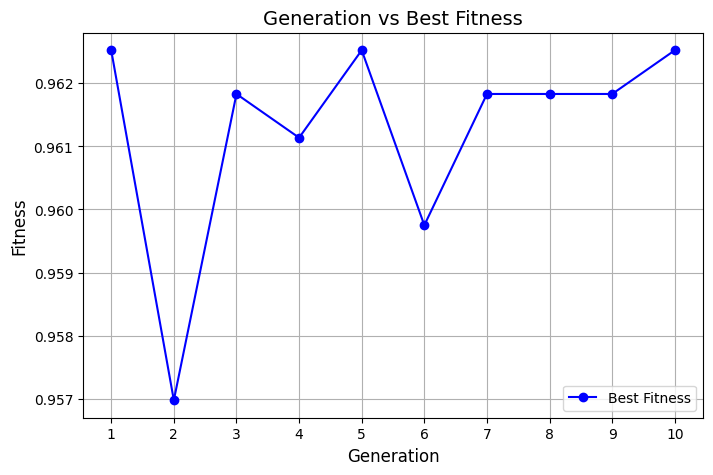

################################### this is Generation 0... #############################################
######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[0. 1. 0. ... 0. 1. 1.]
 [1. 1. 0. ... 1. 1. 1.]
 [0. 1. 1. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 1. 1. 1.]
 [0. 1. 0. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]]
{'accuracy': 0.9541984732824428, 'auc': np.float64(0.9859184779453036), 'f1': 0.9568627450980393, 'precision': 0.9631578947368421, 'recall': 0.9506493506493506, 'specificity': np.float64(0.9582712369597616), 'sensitivity': np.float64(0.9506493506493506)}
Best Individual: [0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1

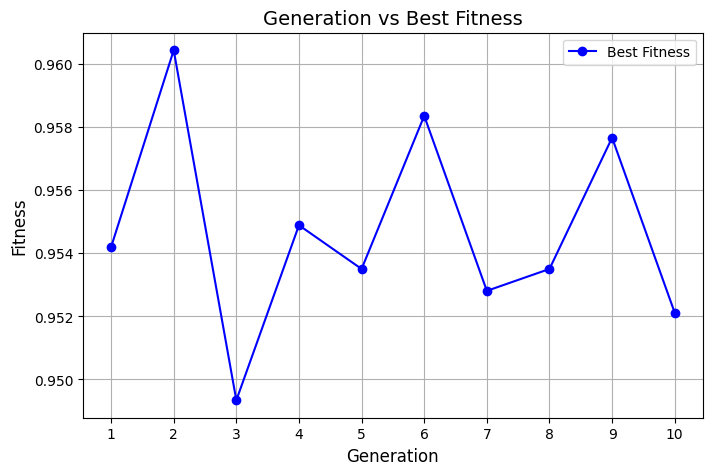

################################### this is Generation 0... #############################################
######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[1. 0. 0. ... 1. 1. 1.]
 [1. 0. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 0. 0.]
 ...
 [1. 0. 1. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 1. 1. 1.]]
{'accuracy': 0.5267175572519084, 'auc': np.float64(0.7323707588983297), 'f1': 0.24390243902439024, 'precision': 0.8333333333333334, 'recall': 0.14285714285714285, 'specificity': np.float64(0.9672131147540983), 'sensitivity': np.float64(0.14285714285714285)}
Best Individual: [1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0.
 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1

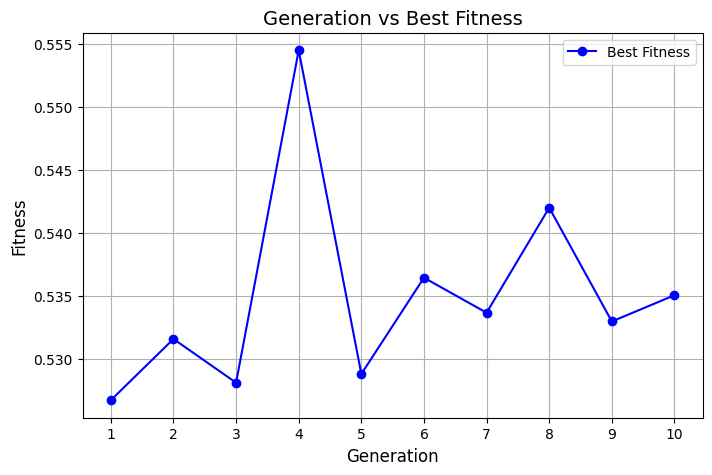

################################### this is Generation 0... #############################################
######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[1. 1. 0. ... 1. 1. 1.]
 [1. 1. 0. ... 1. 0. 1.]
 [0. 1. 0. ... 1. 0. 0.]
 ...
 [1. 0. 1. ... 0. 1. 0.]
 [1. 1. 1. ... 1. 0. 1.]
 [0. 1. 1. ... 1. 0. 0.]]
{'accuracy': 0.9875086745315753, 'auc': np.float64(0.9973803394816808), 'f1': 0.9883720930232558, 'precision': 0.9832904884318766, 'recall': 0.9935064935064936, 'specificity': np.float64(0.9806259314456036), 'sensitivity': np.float64(0.9935064935064936)}
Best Individual: [1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0.
 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1

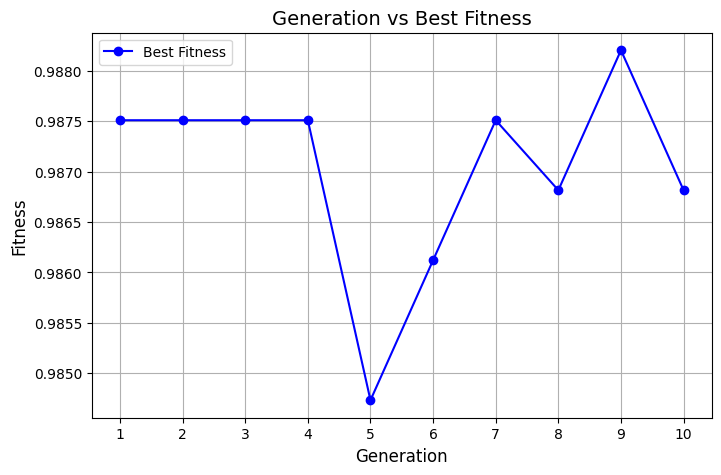

################################### this is Generation 0... #############################################
######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[1. 0. 0. ... 1. 1. 1.]
 [0. 1. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 1. 1. 0.]
 ...
 [0. 0. 0. ... 1. 1. 0.]
 [0. 1. 0. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
{'accuracy': 0.9424011103400416, 'auc': np.float64(0.9416968277624015), 'f1': 0.9464170432537121, 'precision': 0.9409499358151476, 'recall': 0.951948051948052, 'specificity': np.float64(0.9314456035767511), 'sensitivity': np.float64(0.951948051948052)}
Best Individual: [0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 

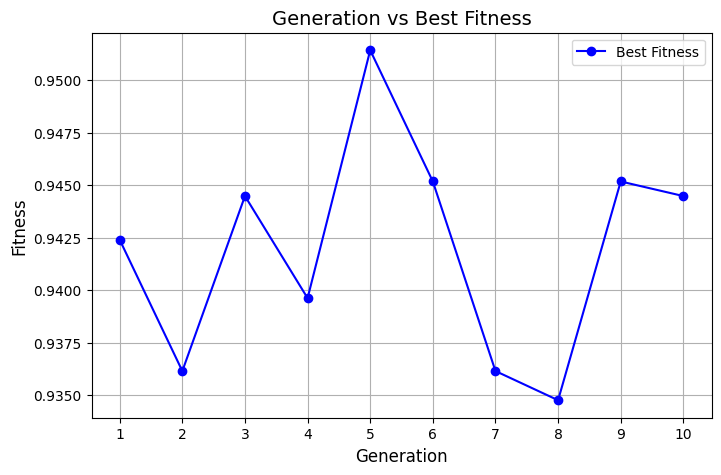

################################### this is Generation 0... #############################################
######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[1. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 1. 1.]
 [1. 0. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 1. 0. 1.]]
{'accuracy': 0.9944482997918113, 'auc': np.float64(0.9993729072715659), 'f1': 0.9948253557567918, 'precision': 0.990979381443299, 'recall': 0.9987012987012988, 'specificity': np.float64(0.9895678092399404), 'sensitivity': np.float64(0.9987012987012988)}
Best Individual: [1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1.
 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.

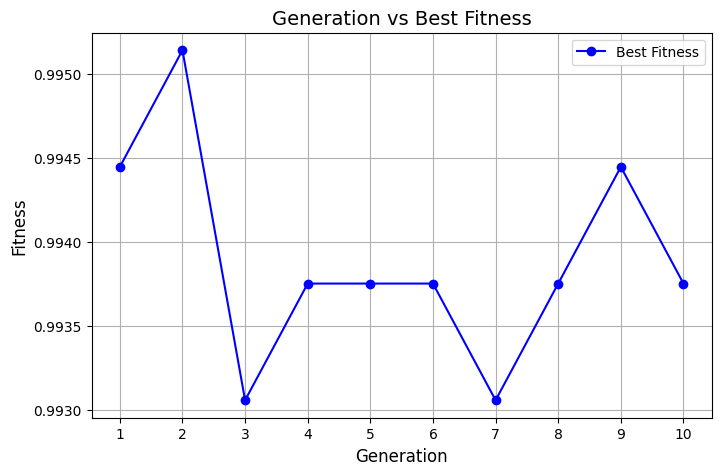

################################### this is Generation 0... #############################################
######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[0. 1. 1. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 1.]
 [0. 1. 0. ... 1. 1. 0.]
 [1. 1. 1. ... 0. 0. 1.]]
{'accuracy': 0.9625260235947258, 'auc': np.float64(0.9909555422223082), 'f1': 0.9655172413793104, 'precision': 0.949748743718593, 'recall': 0.9818181818181818, 'specificity': np.float64(0.940387481371088), 'sensitivity': np.float64(0.9818181818181818)}
Best Individual: [0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0.
 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 

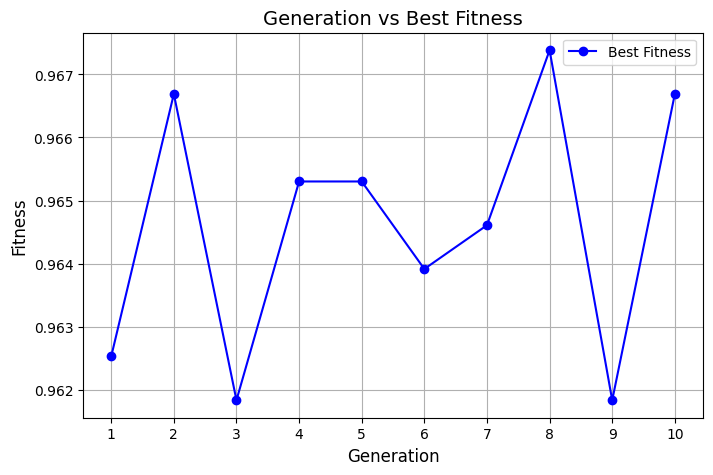

################################### this is Generation 0... #############################################
######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[0. 0. 0. ... 0. 1. 1.]
 [0. 1. 0. ... 1. 0. 0.]
 [0. 1. 1. ... 1. 0. 1.]
 ...
 [1. 0. 1. ... 1. 0. 1.]
 [1. 1. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]]
{'accuracy': 0.9680777238029147, 'auc': np.float64(0.9953471267927303), 'f1': 0.9700520833333334, 'precision': 0.9725848563968669, 'recall': 0.9675324675324676, 'specificity': np.float64(0.9687034277198212), 'sensitivity': np.float64(0.9675324675324676)}
Best Individual: [0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0

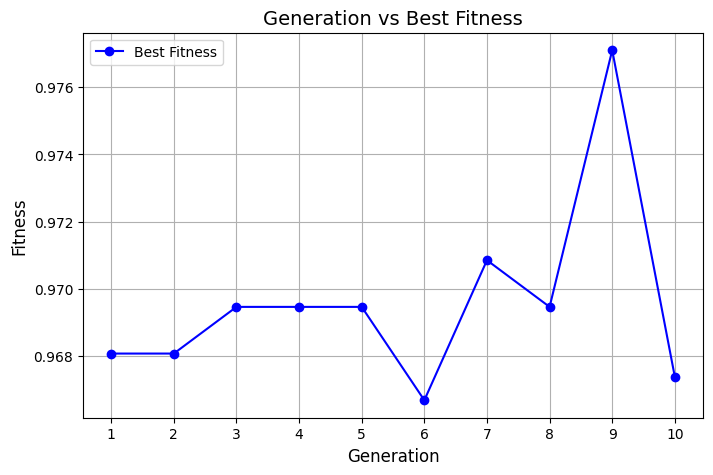

################################### this is Generation 0... #############################################
######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[1. 0. 1. ... 0. 1. 0.]
 [0. 1. 0. ... 1. 1. 0.]
 [1. 0. 1. ... 0. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 0.]
 [1. 1. 0. ... 0. 1. 1.]
 [1. 1. 0. ... 0. 0. 0.]]
{'accuracy': 0.9077029840388618, 'auc': np.float64(0.968000851607409), 'f1': 0.9145793192035967, 'precision': 0.9047013977128335, 'recall': 0.9246753246753247, 'specificity': np.float64(0.8882265275707899), 'sensitivity': np.float64(0.9246753246753247)}
Best Individual: [1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1.
 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0.

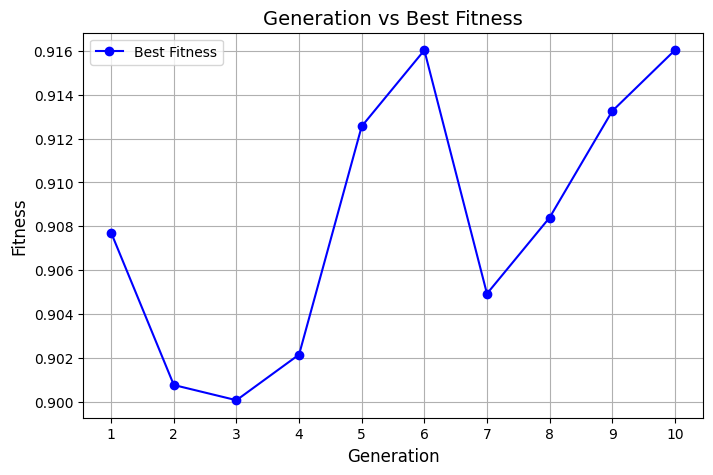

################################### this is Generation 0... #############################################
######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[0. 0. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [1. 1. 0. ... 1. 1. 0.]
 [1. 0. 0. ... 1. 0. 0.]]
{'accuracy': 0.8757807078417765, 'auc': np.float64(0.9418584396229703), 'f1': 0.881063122923588, 'precision': 0.9020408163265307, 'recall': 0.861038961038961, 'specificity': np.float64(0.8926974664679582), 'sensitivity': np.float64(0.861038961038961)}
Best Individual: [0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0

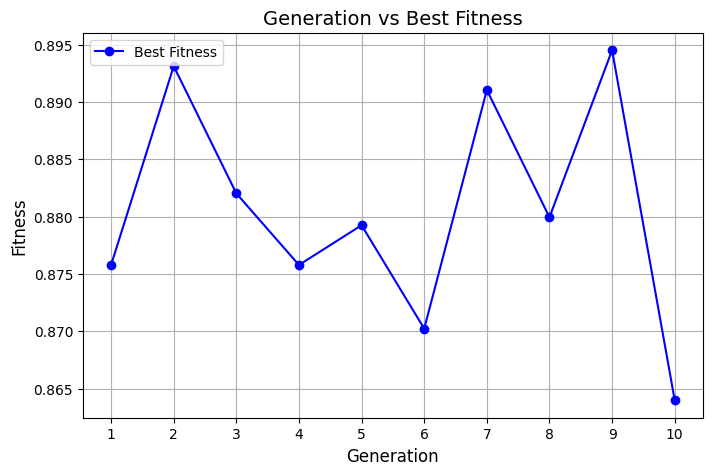

################################### this is Generation 0... #############################################
######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[1. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 1. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 [1. 0. 0. ... 1. 0. 1.]]
{'accuracy': 0.5287994448299792, 'auc': np.float64(0.7389397487758145), 'f1': 0.24972375690607734, 'precision': 0.837037037037037, 'recall': 0.14675324675324675, 'specificity': np.float64(0.9672131147540983), 'sensitivity': np.float64(0.14675324675324675)}
Best Individual: [0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1.
 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0.
 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0.

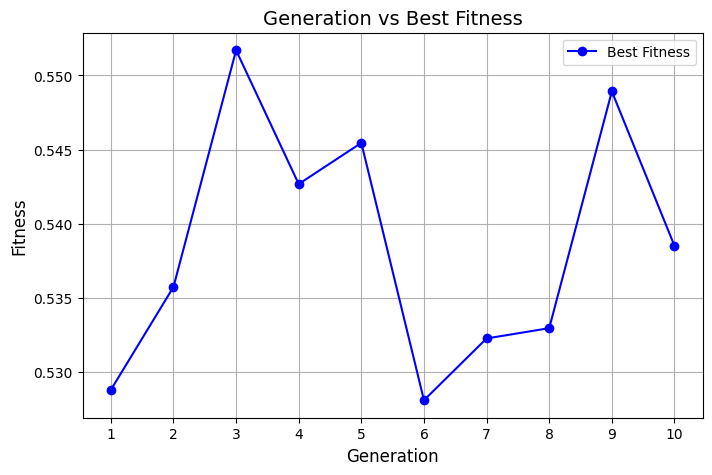

################################### this is Generation 0... #############################################
######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[1. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 1. 1.]
 ...
 [0. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
{'accuracy': 0.9854267869535045, 'auc': np.float64(0.9974403390945865), 'f1': 0.9864077669902913, 'precision': 0.983225806451613, 'recall': 0.9896103896103896, 'specificity': np.float64(0.9806259314456036), 'sensitivity': np.float64(0.9896103896103896)}
Best Individual: [0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1.

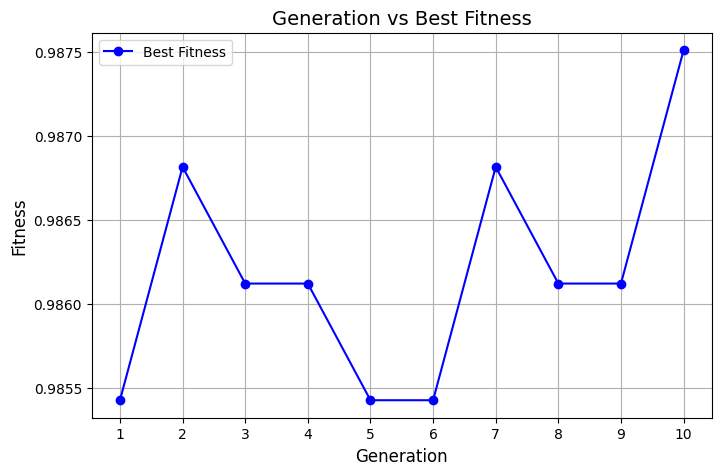

################################### this is Generation 0... #############################################
######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[1. 1. 0. ... 1. 1. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 1. 1.]
 [0. 1. 1. ... 0. 0. 0.]]
{'accuracy': 0.9430950728660652, 'auc': np.float64(0.9424419842452629), 'f1': 0.9470284237726099, 'precision': 0.9421593830334191, 'recall': 0.951948051948052, 'specificity': np.float64(0.9329359165424739), 'sensitivity': np.float64(0.951948051948052)}
Best Individual: [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 

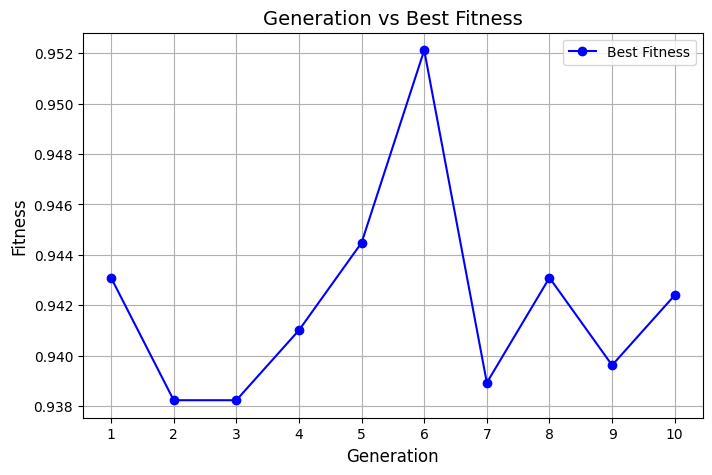

################################### this is Generation 0... #############################################
######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[0. 0. 1. ... 1. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [1. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 1. 0.]]
{'accuracy': 0.9937543372657877, 'auc': np.float64(0.9990980703350301), 'f1': 0.9941822882999354, 'precision': 0.9897039897039897, 'recall': 0.9987012987012988, 'specificity': np.float64(0.9880774962742176), 'sensitivity': np.float64(0.9987012987012988)}
Best Individual: [0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1.
 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1

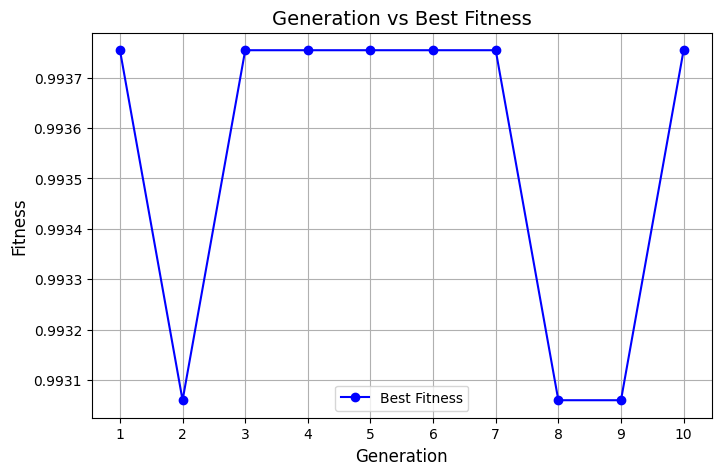

################################### this is Generation 0... #############################################
######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[0. 0. 1. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 1.]]
{'accuracy': 0.9590562109646079, 'auc': np.float64(0.9901126444345522), 'f1': 0.962106615285806, 'precision': 0.951715374841169, 'recall': 0.9727272727272728, 'specificity': np.float64(0.9433681073025335), 'sensitivity': np.float64(0.9727272727272728)}
Best Individual: [1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1.
 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 

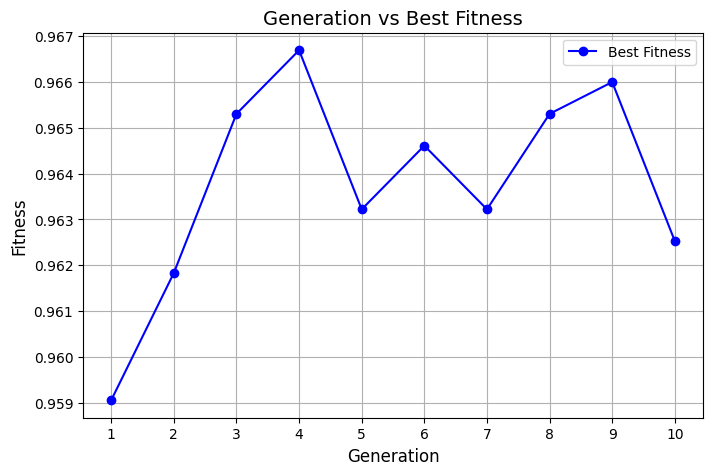

################################### this is Generation 0... #############################################
######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 1. 0. ... 1. 0. 0.]
 ...
 [0. 1. 0. ... 0. 1. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 1.]]
{'accuracy': 0.8896599583622484, 'auc': np.float64(0.9531596570344707), 'f1': 0.8990476190476191, 'precision': 0.8795031055900621, 'recall': 0.9194805194805195, 'specificity': np.float64(0.8554396423248882), 'sensitivity': np.float64(0.9194805194805195)}
Best Individual: [1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1

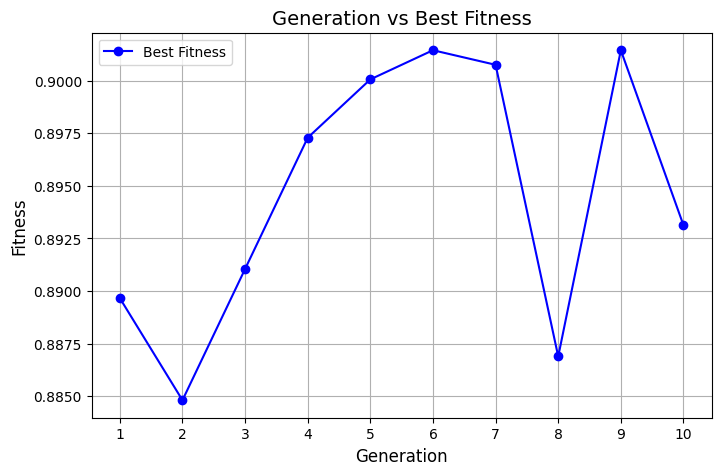

################################### this is Generation 0... #############################################


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[0. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 1. ... 1. 1. 0.]
 [1. 0. 0. ... 0. 1. 1.]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'accuracy': 0.9701596113809854, 'auc': np.float64(0.9865349255811253), 'f1': 0.9722759509993553, 'precision': 0.9654289372599232, 'recall': 0.9792207792207792, 'specificity': np.float64(0.9597615499254843), 'sensitivity': np.float64(0.9792207792207792)}
Best Individual: [0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1.
 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1.
 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0.
 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'accuracy': 0.9701596113809854, 'auc': np.float64(0.9864923452106761), 'f1': 0.9723472668810289, 'precision': 0.9630573248407643, 'recall': 0.9818181818181818, 'specificity': np.float64(0.9567809239940388), 'sensitivity': np.float64(0.9818181818181818)}
Best Individual: [1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1.
 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1.
 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'accuracy': 0.9715475364330326, 'auc': np.float64(0.9867981496893569), 'f1': 0.973462783171521, 'precision': 0.9703225806451613, 'recall': 0.9766233766233766, 'specificity': np.float64(0.9657228017883756), 'sensitivity': np.float64(0.9766233766233766)}
Best Individual: [0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1.
 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1.
 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'accuracy': 0.9694656488549618, 'auc': np.float64(0.9856581570441482), 'f1': 0.9717223650385605, 'precision': 0.9618320610687023, 'recall': 0.9818181818181818, 'specificity': np.float64(0.9552906110283159), 'sensitivity': np.float64(0.9818181818181818)}
Best Individual: [1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0.
 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'accuracy': 0.9701596113809854, 'auc': np.float64(0.9867023438558461), 'f1': 0.9721322099805574, 'precision': 0.9702457956015524, 'recall': 0.974025974025974, 'specificity': np.float64(0.9657228017883756), 'sensitivity': np.float64(0.974025974025974)}
Best Individual: [1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1.
 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.
 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0.
 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'accuracy': 0.9666897987508675, 'auc': np.float64(0.9872587918787621), 'f1': 0.9690721649484536, 'precision': 0.9616368286445013, 'recall': 0.9766233766233766, 'specificity': np.float64(0.9552906110283159), 'sensitivity': np.float64(0.9766233766233766)}
Best Individual: [0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1.
 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'accuracy': 0.9680777238029147, 'auc': np.float64(0.984924613389591), 'f1': 0.9701298701298702, 'precision': 0.9701298701298702, 'recall': 0.9701298701298702, 'specificity': np.float64(0.9657228017883756), 'sensitivity': np.float64(0.9701298701298702)}
Best Individual: [0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1.
 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0.
 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1.
 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'accuracy': 0.9666897987508675, 'auc': np.float64(0.9847388081367218), 'f1': 0.9687906371911573, 'precision': 0.9700520833333334, 'recall': 0.9675324675324676, 'specificity': np.float64(0.9657228017883756), 'sensitivity': np.float64(0.9675324675324676)}
Best Individual: [1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'accuracy': 0.9687716863289383, 'auc': np.float64(0.9862504112876692), 'f1': 0.9709114414996768, 'precision': 0.9665379665379665, 'recall': 0.9753246753246754, 'specificity': np.float64(0.9612518628912071), 'sensitivity': np.float64(0.9753246753246754)}
Best Individual: [1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1.
 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1.
 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'accuracy': 0.9694656488549618, 'auc': np.float64(0.985965896994213), 'f1': 0.9715025906735751, 'precision': 0.9689922480620154, 'recall': 0.974025974025974, 'specificity': np.float64(0.9642324888226528), 'sensitivity': np.float64(0.974025974025974)}
Best Individual: [1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1.
 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0.
 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 

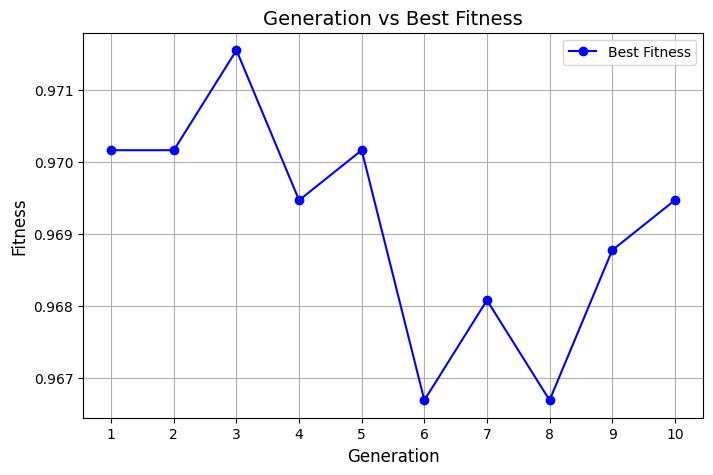

################################### this is Generation 0... #############################################
######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[1. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 1. 1.]
 [0. 1. 0. ... 0. 0. 1.]]
{'accuracy': 0.9646079111727967, 'auc': np.float64(0.9871687924594035), 'f1': 0.967032967032967, 'precision': 0.9626769626769627, 'recall': 0.9714285714285714, 'specificity': np.float64(0.9567809239940388), 'sensitivity': np.float64(0.9714285714285714)}
Best Individual: [1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1.
 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0.
 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.

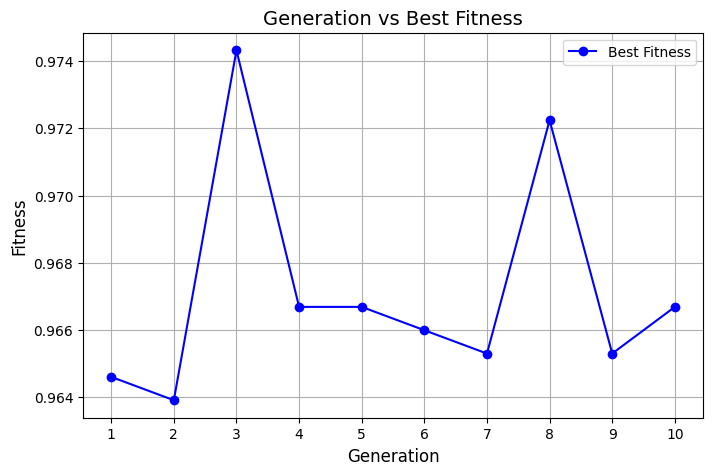

################################### this is Generation 0... #############################################
######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[1. 1. 1. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 1. 0. 1.]
 ...
 [1. 0. 1. ... 1. 1. 1.]
 [0. 1. 0. ... 1. 1. 1.]
 [1. 1. 1. ... 0. 0. 1.]]
{'accuracy': 0.5392088827203331, 'auc': np.float64(0.7286604602550952), 'f1': 0.2860215053763441, 'precision': 0.83125, 'recall': 0.17272727272727273, 'specificity': np.float64(0.9597615499254843), 'sensitivity': np.float64(0.17272727272727273)}
Best Individual: [1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1.
 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1.
 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1

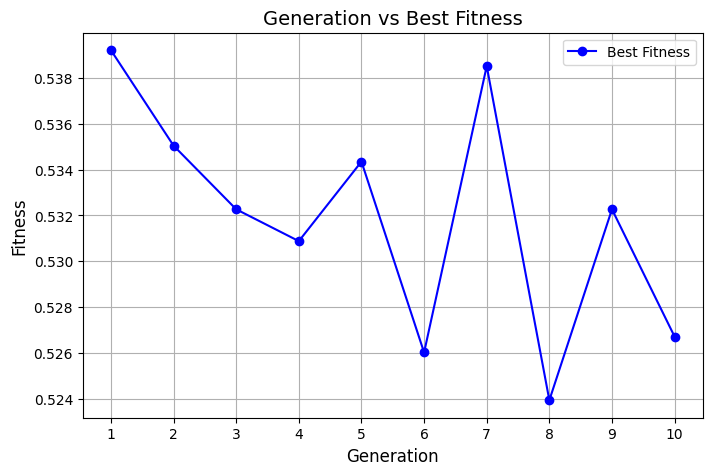

################################### this is Generation 0... #############################################
######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[0. 1. 1. ... 0. 1. 0.]
 [0. 1. 1. ... 0. 1. 0.]
 [1. 1. 0. ... 0. 0. 1.]
 ...
 [0. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [0. 0. 1. ... 1. 0. 1.]]
{'accuracy': 0.9861207494795281, 'auc': np.float64(0.9967735692027794), 'f1': 0.9870633893919794, 'precision': 0.9832474226804123, 'recall': 0.990909090909091, 'specificity': np.float64(0.9806259314456036), 'sensitivity': np.float64(0.990909090909091)}
Best Individual: [0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0.
 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 

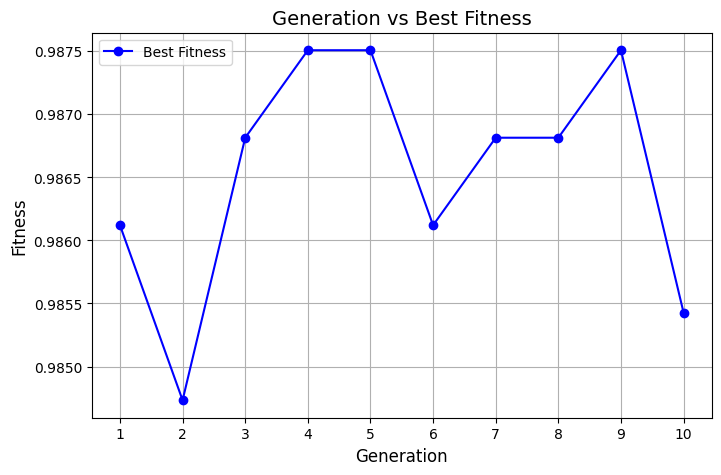

################################### this is Generation 0... #############################################
######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 1. 0. 0.]
 [0. 1. 1. ... 1. 1. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 0. 1.]
 [1. 0. 1. ... 0. 1. 1.]]
{'accuracy': 0.9396252602359473, 'auc': np.float64(0.9391952309985095), 'f1': 0.9436163318211277, 'precision': 0.9417852522639069, 'recall': 0.9454545454545454, 'specificity': np.float64(0.9329359165424739), 'sensitivity': np.float64(0.9454545454545454)}
Best Individual: [0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1

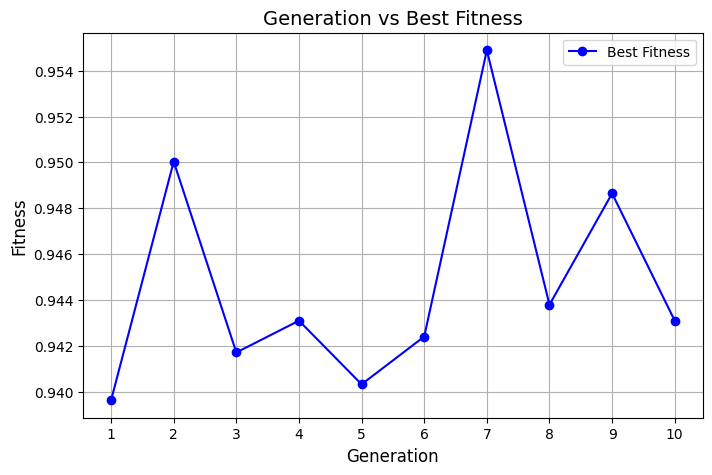

################################### this is Generation 0... #############################################
######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[1. 1. 1. ... 0. 0. 1.]
 [1. 0. 1. ... 0. 1. 1.]
 [1. 1. 0. ... 1. 1. 0.]
 ...
 [1. 0. 0. ... 1. 1. 1.]
 [0. 1. 0. ... 1. 0. 1.]
 [1. 1. 0. ... 0. 0. 0.]]
{'accuracy': 0.9944482997918113, 'auc': np.float64(0.9990458126076606), 'f1': 0.9948253557567918, 'precision': 0.990979381443299, 'recall': 0.9987012987012988, 'specificity': np.float64(0.9895678092399404), 'sensitivity': np.float64(0.9987012987012988)}
Best Individual: [1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.

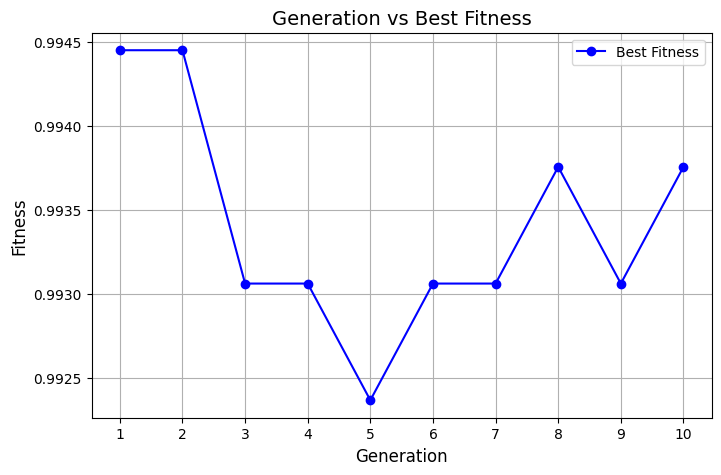

################################### this is Generation 0... #############################################
######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[1. 0. 0. ... 0. 0. 1.]
 [0. 1. 1. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 0.]]
{'accuracy': 0.9618320610687023, 'auc': np.float64(0.9891207153502235), 'f1': 0.9649458253664754, 'precision': 0.9474342928660826, 'recall': 0.9831168831168832, 'specificity': np.float64(0.9374068554396423), 'sensitivity': np.float64(0.9831168831168832)}
Best Individual: [1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1

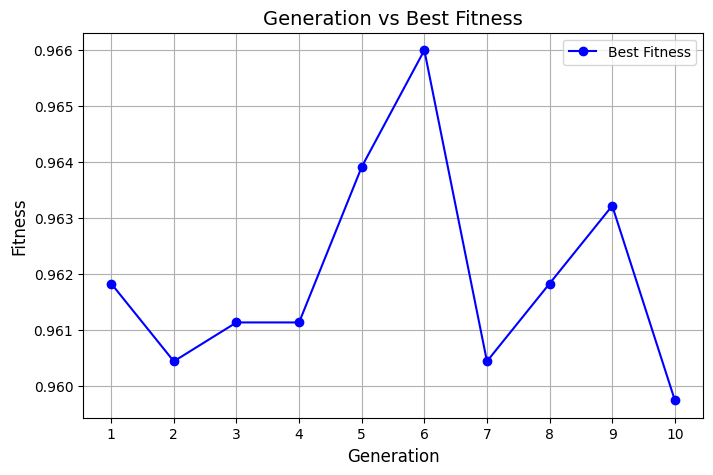

################################### this is Generation 0... #############################################
######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[0. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 1. 0. 1.]
 ...
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]
 [1. 0. 0. ... 1. 0. 1.]]
{'accuracy': 0.5343511450381679, 'auc': np.float64(0.7866568602783207), 'f1': 0.6965174129353234, 'precision': 0.5343511450381679, 'recall': 1.0, 'specificity': np.float64(0.0), 'sensitivity': np.float64(1.0)}
Best Individual: [0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0.
 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 1. 0. 

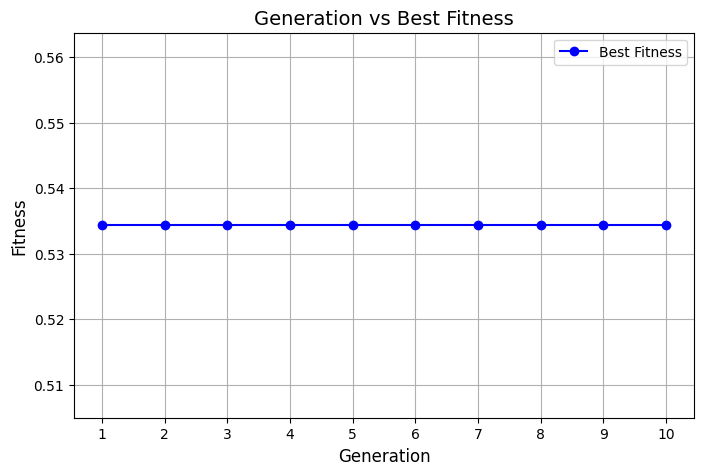

################################### this is Generation 0... #############################################
######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[0. 0. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 0. 0. 1.]
 [0. 1. 1. ... 0. 0. 1.]
 ...
 [0. 0. 1. ... 0. 0. 1.]
 [1. 0. 0. ... 1. 1. 1.]
 [1. 1. 0. ... 1. 0. 1.]]
{'accuracy': 0.9694656488549618, 'auc': np.float64(0.9933555267385372), 'f1': 0.9715762273901809, 'precision': 0.9665809768637532, 'recall': 0.9766233766233766, 'specificity': np.float64(0.9612518628912071), 'sensitivity': np.float64(0.9766233766233766)}
Best Individual: [0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0.
 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1

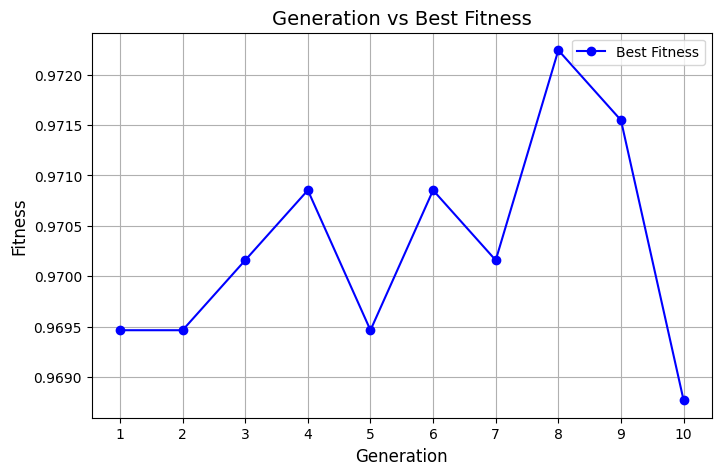

################################### this is Generation 0... #############################################
######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[1. 1. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 1. 0.]
 ...
 [0. 1. 1. ... 1. 1. 1.]
 [0. 1. 0. ... 0. 0. 1.]
 [1. 1. 0. ... 0. 0. 1.]]
{'accuracy': 0.9902845246356696, 'auc': np.float64(0.9973958232527531), 'f1': 0.9909443725743855, 'precision': 0.9871134020618557, 'recall': 0.9948051948051948, 'specificity': np.float64(0.9850968703427719), 'sensitivity': np.float64(0.9948051948051948)}
Best Individual: [1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1.
 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0

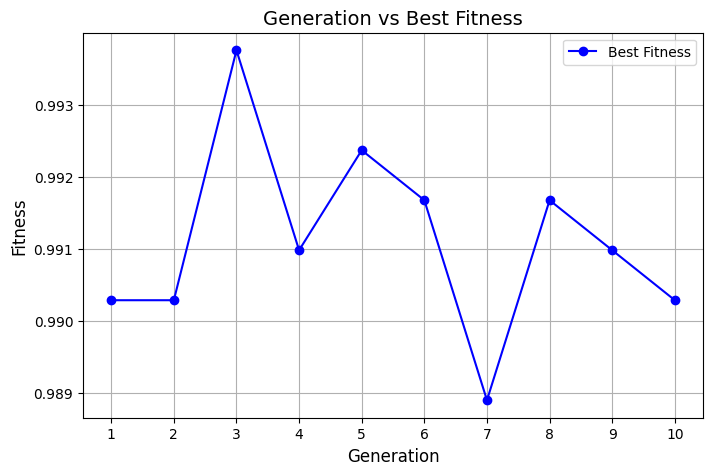

################################### this is Generation 0... #############################################
######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[0. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 1. 1. ... 1. 1. 0.]
 [1. 1. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]]
{'accuracy': 0.6974323386537127, 'auc': np.float64(0.7492964561518958), 'f1': 0.7021857923497268, 'precision': 0.7406340057636888, 'recall': 0.6675324675324675, 'specificity': np.float64(0.7317436661698957), 'sensitivity': np.float64(0.6675324675324675)}
Best Individual: [1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1.
 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1

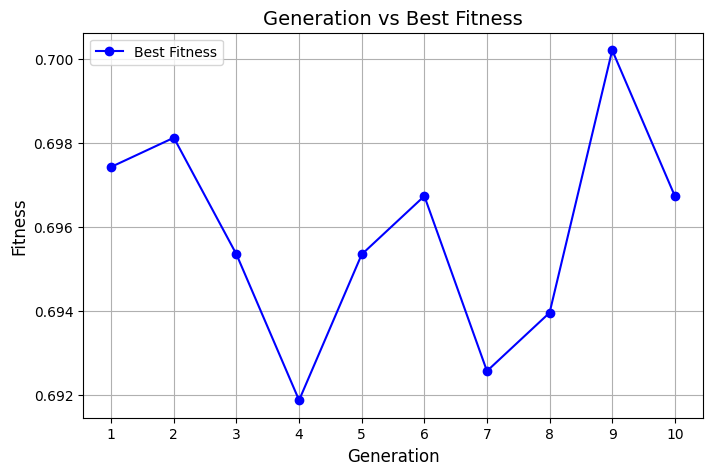

################################### this is Generation 0... #############################################
######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[1. 0. 0. ... 0. 1. 0.]
 [1. 1. 0. ... 0. 1. 0.]
 [0. 1. 1. ... 0. 1. 1.]
 ...
 [1. 1. 1. ... 0. 1. 1.]
 [1. 0. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 1. 1.]]
{'accuracy': 0.9868147120055517, 'auc': np.float64(0.9971567925368224), 'f1': 0.9876863253402463, 'precision': 0.9857697283311773, 'recall': 0.9896103896103896, 'specificity': np.float64(0.9836065573770492), 'sensitivity': np.float64(0.9896103896103896)}
Best Individual: [1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0

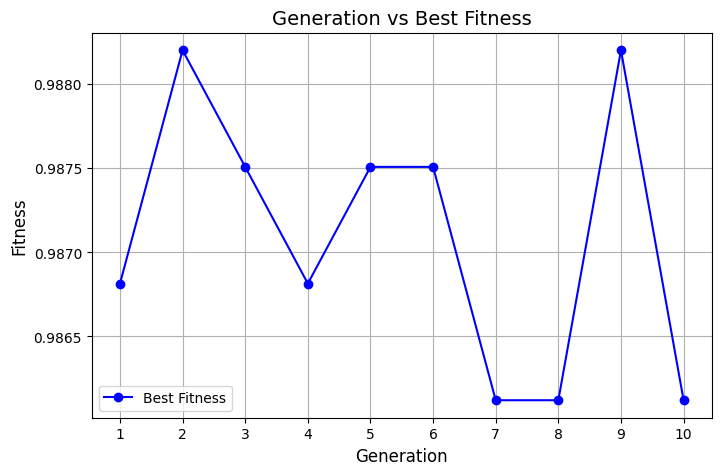

################################### this is Generation 0... #############################################
######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[0. 1. 0. ... 1. 1. 0.]
 [0. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 0. 1. 1.]
 ...
 [0. 0. 1. ... 1. 1. 1.]
 [0. 1. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 1. 1.]]
{'accuracy': 0.9424011103400416, 'auc': np.float64(0.9418884394294231), 'f1': 0.9462783171521035, 'precision': 0.9432258064516129, 'recall': 0.9493506493506494, 'specificity': np.float64(0.9344262295081968), 'sensitivity': np.float64(0.9493506493506494)}
Best Individual: [0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0.
 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1

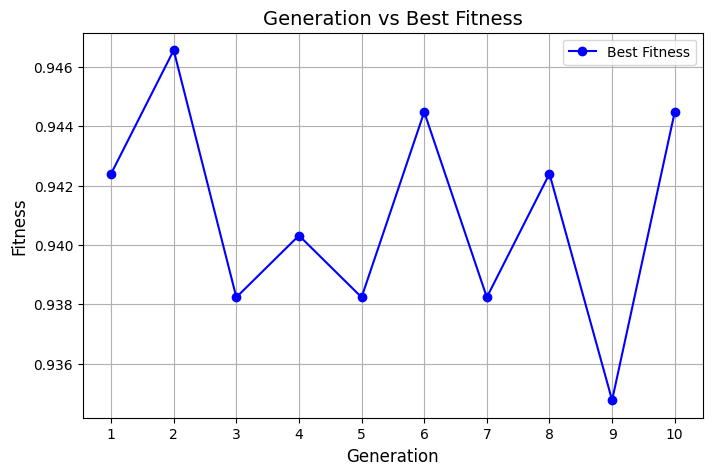

################################### this is Generation 0... #############################################
######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[0. 1. 1. ... 1. 1. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 [1. 1. 0. ... 0. 1. 1.]
 ...
 [0. 1. 1. ... 1. 1. 0.]
 [0. 0. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]]
{'accuracy': 0.9937543372657877, 'auc': np.float64(0.9993458106721893), 'f1': 0.9941822882999354, 'precision': 0.9897039897039897, 'recall': 0.9987012987012988, 'specificity': np.float64(0.9880774962742176), 'sensitivity': np.float64(0.9987012987012988)}
Best Individual: [1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1

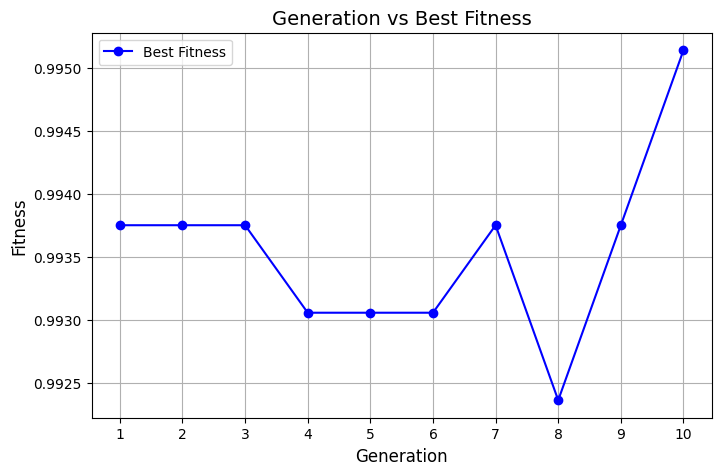

################################### this is Generation 0... #############################################
######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[1. 0. 0. ... 1. 0. 0.]
 [0. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 1. 1.]]
{'accuracy': 0.9646079111727967, 'auc': np.float64(0.9921700505158032), 'f1': 0.9672025723472669, 'precision': 0.9579617834394905, 'recall': 0.9766233766233766, 'specificity': np.float64(0.9508196721311475), 'sensitivity': np.float64(0.9766233766233766)}
Best Individual: [1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0.
 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1.
 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0

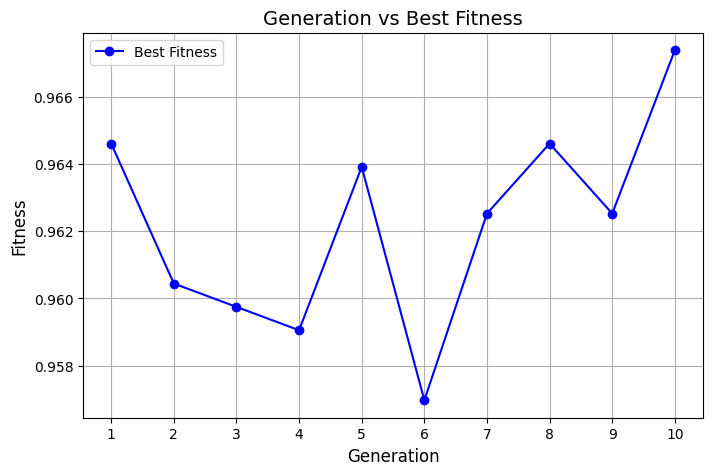

################################### this is Generation 0... #############################################
######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[1. 0. 0. ... 1. 1. 0.]
 [1. 0. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 0. 1. 1.]
 ...
 [0. 0. 1. ... 1. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 1. 0. 0.]]
{'accuracy': 0.9923664122137404, 'auc': np.float64(0.9988019432132695), 'f1': 0.9929078014184397, 'precision': 0.9859154929577465, 'recall': 1.0, 'specificity': np.float64(0.9836065573770492), 'sensitivity': np.float64(1.0)}
Best Individual: [0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0.
 0. 1. 0. 1. 

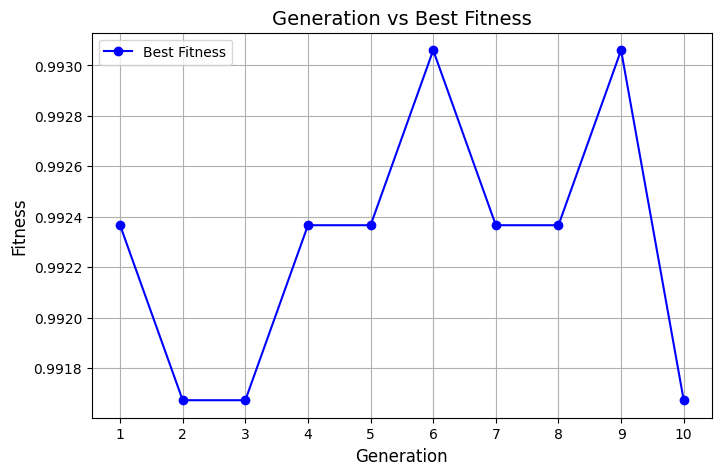

################################### this is Generation 0... #############################################
######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[1. 1. 0. ... 1. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [1. 0. 1. ... 0. 1. 0.]
 [0. 1. 0. ... 1. 0. 1.]
 [1. 1. 0. ... 1. 1. 0.]]
{'accuracy': 0.9770992366412213, 'auc': np.float64(0.9947374533067529), 'f1': 0.9787781350482315, 'precision': 0.9694267515923567, 'recall': 0.9883116883116884, 'specificity': np.float64(0.9642324888226528), 'sensitivity': np.float64(0.9883116883116884)}
Best Individual: [1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0.
 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0

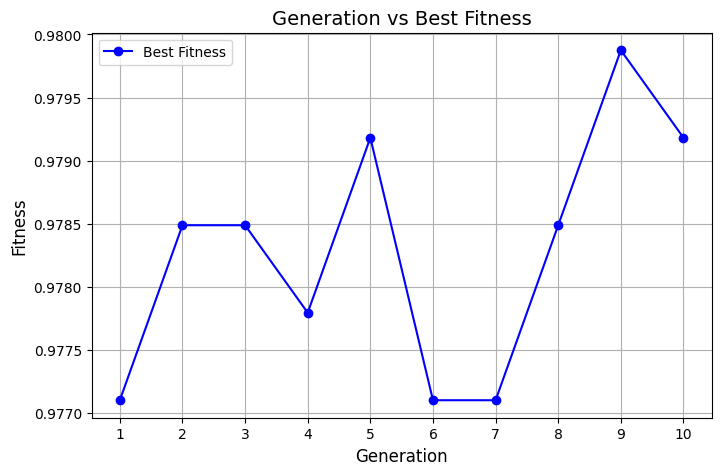

################################### this is Generation 0... #############################################
######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 1. 1.]
 [1. 0. 0. ... 1. 1. 0.]
 ...
 [0. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 0. 0. 1.]
 [0. 1. 1. ... 1. 1. 1.]]
{'accuracy': 0.9861207494795281, 'auc': np.float64(0.9941597150986122), 'f1': 0.9869960988296489, 'precision': 0.98828125, 'recall': 0.9857142857142858, 'specificity': np.float64(0.9865871833084948), 'sensitivity': np.float64(0.9857142857142858)}
Best Individual: [0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 

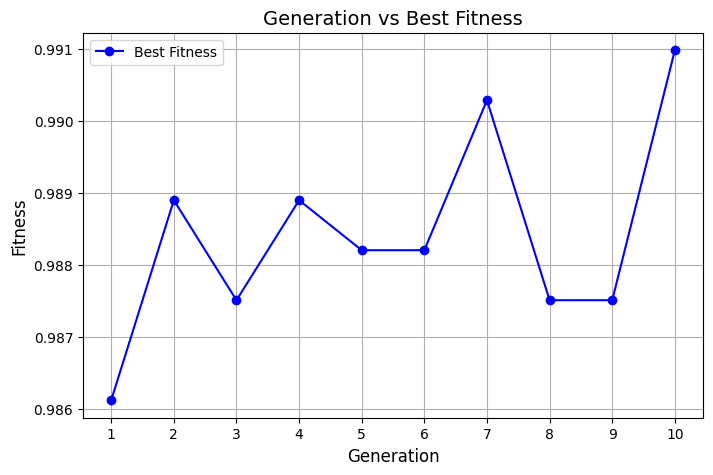

################################### this is Generation 0... #############################################
######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[0. 1. 1. ... 1. 1. 0.]
 [1. 0. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [0. 0. 1. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]]
{'accuracy': 0.6724496877168633, 'auc': np.float64(0.7566947955174483), 'f1': 0.6277602523659306, 'precision': 0.7991967871485943, 'recall': 0.5168831168831168, 'specificity': np.float64(0.8509687034277198), 'sensitivity': np.float64(0.5168831168831168)}
Best Individual: [1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1.
 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0.
 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0

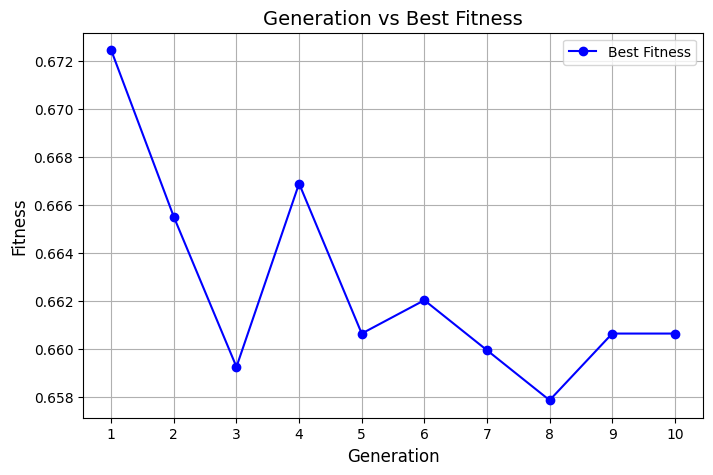

################################### this is Generation 0... #############################################
######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[1. 1. 0. ... 1. 0. 0.]
 [0. 1. 1. ... 0. 0. 1.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [1. 1. 0. ... 0. 1. 0.]
 [1. 1. 1. ... 1. 0. 1.]
 [0. 1. 1. ... 1. 0. 1.]]
{'accuracy': 0.9861207494795281, 'auc': np.float64(0.9977074341455862), 'f1': 0.9870298313878081, 'precision': 0.9857512953367875, 'recall': 0.9883116883116884, 'specificity': np.float64(0.9836065573770492), 'sensitivity': np.float64(0.9883116883116884)}
Best Individual: [0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0.
 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0

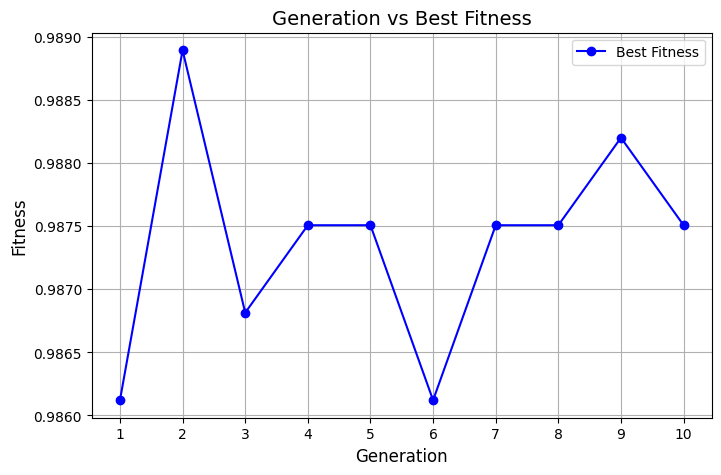

################################### this is Generation 0... #############################################
######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[0. 0. 1. ... 1. 0. 1.]
 [1. 0. 0. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [0. 1. 0. ... 1. 1. 0.]
 [0. 1. 0. ... 1. 1. 1.]
 [0. 0. 1. ... 1. 0. 0.]]
{'accuracy': 0.9417071478140181, 'auc': np.float64(0.9406642537790078), 'f1': 0.9460154241645244, 'precision': 0.9363867684478372, 'recall': 0.9558441558441558, 'specificity': np.float64(0.9254843517138599), 'sensitivity': np.float64(0.9558441558441558)}
Best Individual: [0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1

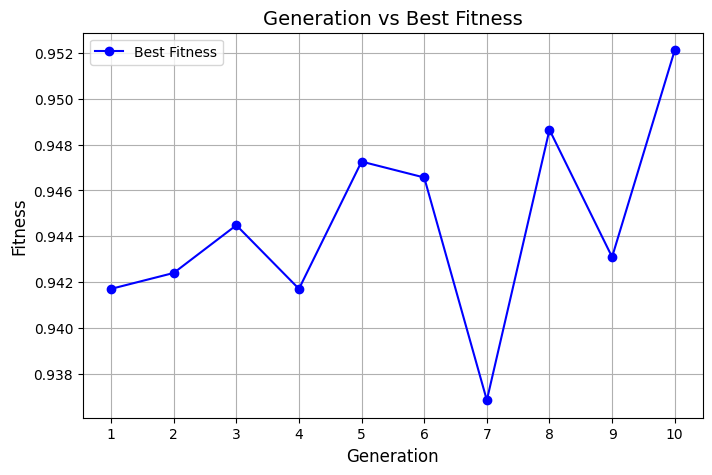

################################### this is Generation 0... #############################################
######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[0. 1. 1. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [1. 0. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 0. 1. 0.]
 [0. 1. 1. ... 0. 0. 1.]]
{'accuracy': 0.993060374739764, 'auc': np.float64(0.9988696847117116), 'f1': 0.9935316946959897, 'precision': 0.9896907216494846, 'recall': 0.9974025974025974, 'specificity': np.float64(0.9880774962742176), 'sensitivity': np.float64(0.9974025974025974)}
Best Individual: [1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0.
 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0.
 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.

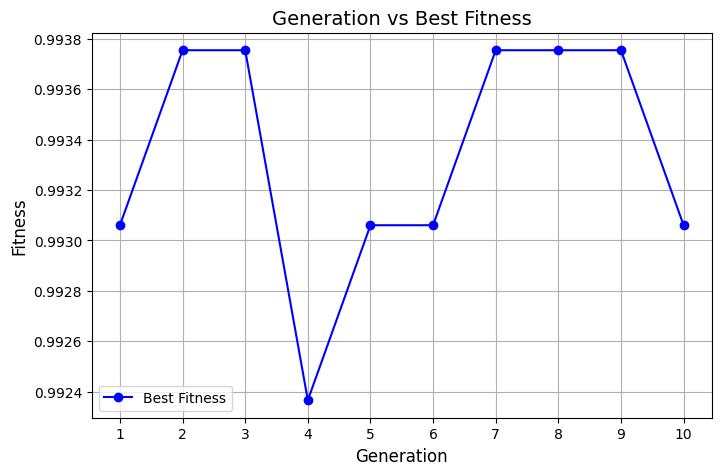

################################### this is Generation 0... #############################################
######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[1. 0. 1. ... 0. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [1. 0. 0. ... 1. 1. 1.]
 ...
 [1. 0. 0. ... 0. 1. 1.]
 [0. 0. 1. ... 0. 0. 1.]
 [1. 0. 1. ... 0. 1. 1.]]
{'accuracy': 0.9611380985426787, 'auc': np.float64(0.9918206979309812), 'f1': 0.9642857142857143, 'precision': 0.9473684210526315, 'recall': 0.9818181818181818, 'specificity': np.float64(0.9374068554396423), 'sensitivity': np.float64(0.9818181818181818)}
Best Individual: [1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1.
 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1

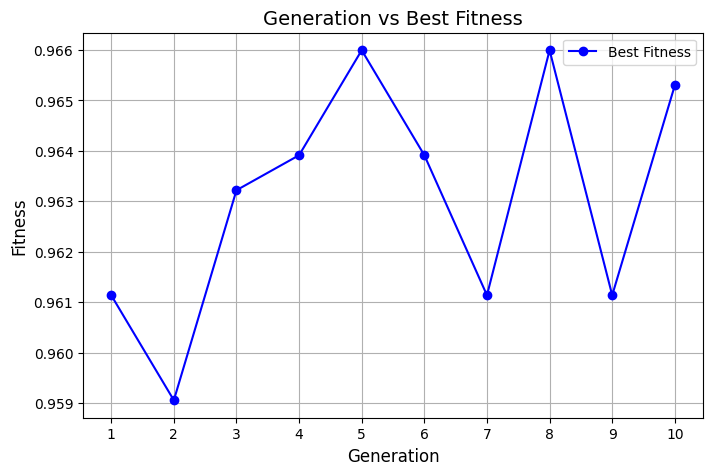

################################### this is Generation 0... #############################################
######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[0. 1. 0. ... 1. 1. 0.]
 [1. 1. 1. ... 0. 0. 1.]
 [1. 0. 1. ... 0. 1. 0.]
 ...
 [1. 0. 1. ... 0. 1. 0.]
 [0. 1. 1. ... 0. 0. 1.]
 [0. 1. 0. ... 1. 0. 0.]]
{'accuracy': 0.9923664122137404, 'auc': np.float64(0.9993806491571021), 'f1': 0.9928986442866365, 'precision': 0.9871630295250321, 'recall': 0.9987012987012988, 'specificity': np.float64(0.9850968703427719), 'sensitivity': np.float64(0.9987012987012988)}
Best Individual: [0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1

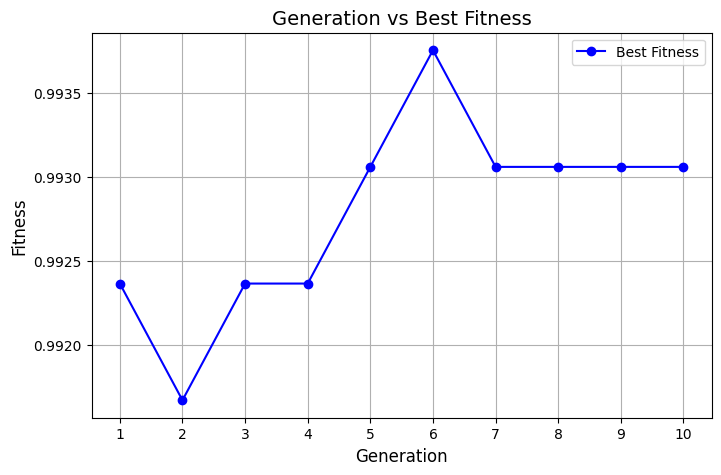

In [ ]:
# Load and preprocess dataset
ds = pd.read_csv("HT_SelectedFeatures_KW.csv")
ds = shuffle(ds, random_state=42)

X = ds.drop(columns=['Label'])
y = ds['Label']

scalers = ["ss", 'minmax', 'robust', 'qt', 'pt']
learners = ["lr", "knn", "nb", "rf", "dt", "xgb", "ada", "svm"]

results = []
for scaler in scalers:
  for learner in learners:
    qga = QGA_TTS(X, y, n_of_pop=10, n_of_gen=10, scaler=scaler, learner=learner)
    Q = qga.run_gen_0()
    best_indi, best_accuracy, best_auc, best_precision, best_f1_score, best_recall, best_sensitivity, best_specificity, best_num_features = qga.run_qga(Q[0])
    new_dataset = qga.build_new_dataset(best_indi)
    feature_names = new_dataset.columns.tolist()

    result = {
        "Scaler": scaler,
        "Learner": learner,
        "Accuracy": best_accuracy,
        "AUC": best_auc,
        "Precision": best_precision,
        "F1 Score": best_f1_score,
        "Recall": best_recall,
        "Sensitivity": best_sensitivity,
        "Specificity": best_specificity,
        "Number of Features": best_num_features,
        "Feature Names": feature_names
    }
    results.append(result)

df = pd.DataFrame(results)
df.to_csv("QIEA_HT_Results.csv", index=False)


Streaming output truncated to the last 5000 lines.
Updated Xij after crossover: 
 [[0.019 0.22  0.099 ... 0.13  0.235 0.145]
 [0.99  0.969 0.987 ... 0.984 0.966 0.982]
 [1.    1.    1.    ... 1.    1.    0.   ]]
Xij: [[0.067 0.145 0.205 ... 0.13  0.051 0.16 ]
 [0.989 0.982 0.972 ... 0.984 0.99  0.98 ]
 [1.    1.    1.    ... 1.    1.    1.   ]] 
 fitness: 0.9937543372657877
Updated Xij after crossover: 
 [[0.051 0.13  0.19  ... 0.115 0.035 0.145]
 [0.99  0.984 0.975 ... 0.986 0.99  0.982]
 [1.    1.    1.    ... 1.    1.    1.   ]]
Xij: [[0.115 0.145 0.175 ... 0.145 0.22  0.035]
 [0.986 0.982 0.978 ... 0.982 0.969 0.99 ]
 [1.    1.    1.    ... 1.    1.    1.   ]] 
 fitness: 0.9923664122137404
Updated Xij after crossover: 
 [[0.099 0.13  0.16  ... 0.13  0.205 0.019]
 [0.987 0.984 0.98  ... 0.984 0.972 0.99 ]
 [1.    1.    1.    ... 1.    1.    1.   ]]
Xij: [[0.019 0.115 0.099 ... 0.019 0.175 0.067]
 [0.99  0.986 0.987 ... 0.99  0.978 0.989]
 [1.    1.    1.    ... 1.    1.    1.   ]] 


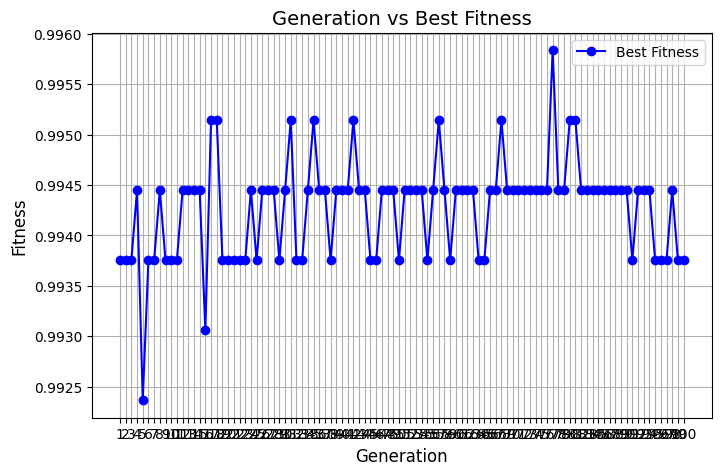

In [ ]:
# Load and preprocess dataset
ds = pd.read_csv("HT_SelectedFeatures_KW.csv")
ds = shuffle(ds, random_state=42)

X = ds.drop(columns=['Label'])
y = ds['Label']

scalers = ['qt']
learners = ["xgb"]

results = []
for scaler in scalers:
  for learner in learners:
    qga = QGA_TTS(X, y, n_of_pop=20, n_of_gen=100, scaler=scaler, learner=learner)
    Q = qga.run_gen_0()
    best_indi, best_accuracy, best_auc, best_precision, best_f1_score, best_recall, best_sensitivity, best_specificity, best_num_features = qga.run_qga(Q[0])
    new_dataset = qga.build_new_dataset(best_indi)
    feature_names = new_dataset.columns.tolist()

    result = {
        "Scaler": scaler,
        "Learner": learner,
        "Accuracy": best_accuracy,
        "AUC": best_auc,
        "Precision": best_precision,
        "F1 Score": best_f1_score,
        "Recall": best_recall,
        "Sensitivity": best_sensitivity,
        "Specificity": best_specificity,
        "Number of Features": best_num_features,
        "Feature Names": feature_names
    }
    results.append(result)

df = pd.DataFrame(results)
df.to_csv("QIEA_HT_Results.csv", index=False)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import random

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, confusion_matrix, accuracy_score

In [ ]:
class QGA_TTS_New:
  def __init__(self, X, y, n_of_pop, n_of_gen, scaler, learner, primary_eval_metrics = "accuracy") -> None:
    self.X =  X
    self.y = y
    self.n_of_pop = n_of_pop
    self.n_of_gen = n_of_gen
    self.fitness_per_gen = []
    self.generation_fitness = []
    self.scaler = scaler
    self.learner = learner
    self.primary_eval_metrics = primary_eval_metrics

  def initialize(self):
    n_of_feat =  len(self.X.columns)
    angle = 0.25*np.pi
    alpha = np.sin(angle)
    beta = np.cos(angle)

    alphas = np.round(np.array([alpha for i in range(n_of_feat)]), 3)
    betas = np.round(np.array([beta for i in range(n_of_feat)]), 3)

    individual_alpha_beta = np.vstack([alphas, betas])
    Q = np.tile(individual_alpha_beta, (self.n_of_pop, 1, 1))

    Q_0 = Q.copy()

    return Q, alpha, beta
  def observe(self, Q):
    n_of_feat = len(self.X.columns)
    X_obs = np.zeros([self.n_of_pop, n_of_feat])
    population_alpha = Q[:, 0, :]
    for i in range(population_alpha.shape[0]):
        for j in range(population_alpha.shape[1]):
            rand = np.random.rand()
            if rand>population_alpha[i, j]**2:
                X_obs[i, j] = 1

    for individual in X_obs:
        if not np.any(individual):
            zero_indices = np.where(individual == 0)[0]
            random_index = np.random.choice(zero_indices)
            individual[random_index] = 1

    return X_obs
  def evaluate(self, X_obs):
        fitness = []
        results = {}

        for individual in X_obs:
            selected_features = [col for i, col in enumerate(self.X.columns) if individual[i] == 1]
            if not selected_features:
                continue

            dataset = self.X[selected_features]
            scaler_map = {
                "ss": StandardScaler(),
                "minmax": MinMaxScaler(),
                "robust": RobustScaler(),
                "qt": QuantileTransformer(),
                "pt": PowerTransformer(),
            }
            clf_map = {
                "nb": GaussianNB(),
                "lr": LogisticRegression(max_iter = 1000),
                "dt": DecisionTreeClassifier(),
                "rf": RandomForestClassifier(),
                "knn": KNeighborsClassifier(),
                "xgb": XGBClassifier(),
                "ada": AdaBoostClassifier(),
                "svm": SVC(probability=True)
            }

            dataset_scaled = scaler_map[self.scaler].fit_transform(dataset)
            X_train, X_test, y_train, y_test = train_test_split(dataset_scaled, self.y, test_size=0.2, random_state=42)
            clf = clf_map[self.learner]
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            y_proba = clf.predict_proba(X_test)[:, 1]

            tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
            metrics = {
                "accuracy": accuracy_score(y_test, y_pred),
                "auc": roc_auc_score(y_test, y_proba) if len(set(y_test)) > 1 else 0,
                "f1": f1_score(y_test, y_pred),
                "precision": precision_score(y_test, y_pred),
                "recall": recall_score(y_test, y_pred),
                "specificity": tn / (tn + fp) if (tn + fp) > 0 else 0,
                "sensitivity": tp / (tp + fn) if (tp + fn) > 0 else 0,
            }

            fitness.append(metrics[self.primary_eval_metrics])
            results[tuple(individual)] = metrics

        return fitness, max(fitness), results

  def storage(self, results, alpha, beta, f):
   # f = max(pop_acc.values())
    #best_pops = [key for key, value in results.items() if value == f]
    best_pops = [key for key, value in results.items() if value[self.primary_eval_metrics] == f]
    chosen_pop = random.choice(best_pops)

    B = np.array([
        list(chosen_pop),
        [np.round(alpha, 3)] * len(chosen_pop),
        [np.round(beta, 3)] * len(chosen_pop)
    ])
    fitness_B = f
    return B, fitness_B

  def run_gen_0(self):
    print("################################### this is Generation 0... #############################################")
    Q, alpha, beta = self.initialize()
    X_obs = self.observe(Q)
    fitness, f, results = self.evaluate(X_obs)
    B, fitness_B = self.storage(results, alpha, beta, f)
    return Q, X_obs, fitness, f, B, fitness_B

  def crossover(self, crossover_X, X_fitness, B, B_fitness):
    # crossover:
    n_of_feat = len(self.X.columns)
    for i in range(n_of_feat):
      if crossover_X[2, i] == 0 and B[0, i] == 0:
        delta_theta = 0

      elif crossover_X[2, i] == 0 and B[0, i] == 1:
        if X_fitness > B_fitness:
          delta_theta = 0.05*np.pi
          if crossover_X[0, i]*crossover_X[1, i] > 0:
            delta_theta = -delta_theta
          elif crossover_X[0, i]*crossover_X[1, i] < 0:
            delta_theta = delta_theta
          elif crossover_X[0, i] == 0:
            delta_theta = delta_theta
          elif crossover_X[1, i] == 0:
            delta_theta = 0
        else:
          delta_theta = 0

      elif crossover_X[2, i] == 1 and B[0, i] == 0:
        if X_fitness > B_fitness:
          delta_theta = 0.025*np.pi
          if crossover_X[0, i]*crossover_X[1, i] > 0:
            delta_theta = delta_theta
          elif crossover_X[0, i]*crossover_X[1, i] < 0:
            delta_theta = -delta_theta
          elif crossover_X[0, i] == 0:
            delta_theta = 0
          elif crossover_X[1, i] == 0:
            delta_theta = delta_theta
        else:
          delta_theta = 0.01*np.pi
          if crossover_X[0, i]*crossover_X[1, i] > 0:
            delta_theta = -delta_theta
          elif crossover_X[0, i]*crossover_X[1, i] < 0:
            delta_theta = delta_theta
          elif crossover_X[0, i] == 0:
            delta_theta = delta_theta
          elif crossover_X[1, i] == 0:
            delta_theta = 0

      elif crossover_X[2, i] == 1 and B[0, i] == 1:
        if X_fitness > B_fitness:
          delta_theta = 0.025*np.pi
          if crossover_X[0, i]*crossover_X[1, i] > 0:
            delta_theta = delta_theta
          elif crossover_X[0, i]*crossover_X[1, i] < 0:
            delta_theta = -delta_theta
          elif crossover_X[0, i] == 0:
            delta_theta = 0
          elif crossover_X[1, i] == 0:
            delta_theta = delta_theta
        else:
          delta_theta = 0.005*np.pi
          if crossover_X[0, i]*crossover_X[1, i] > 0:
            delta_theta = delta_theta
          elif crossover_X[0, i]*crossover_X[1, i] < 0:
            delta_theta = -delta_theta
          elif crossover_X[0, i] == 0:
            delta_theta = 0
          elif crossover_X[1, i] == 0:
            delta_theta = delta_theta

        crossover_X[0, i] = np.round(np.cos(delta_theta)*crossover_X[0, i] - np.sin(delta_theta)*crossover_X[1, i], 3)
        crossover_X[1, i] = np.round(np.sin(delta_theta)*crossover_X[0, i] + np.cos(delta_theta)*crossover_X[1, i], 3)

    return np.array(crossover_X)
  def find_best_individual(self, population, results):
      best_individual = None
      best_fitness = -float('inf')
      min_features = float('inf')

      for individual in population:
          individual_tuple = tuple(individual)
          fitness = results[individual_tuple]['accuracy']
          num_features = sum(individual)

          if (fitness > best_fitness) or (fitness == best_fitness and num_features < min_features):
              best_individual = individual
              best_fitness = fitness
              min_features = num_features

      best_individual_tuple = tuple(best_individual.flatten())
      best_metrics = results[best_individual_tuple]
      print(best_metrics)

      return {
          "best_individual": best_individual,
          "fitness": best_fitness,
          "num_features": min_features,
          "precision": best_metrics['precision'],
          "recall": best_metrics['recall'],
          "f1": best_metrics['f1'],
          "accuracy": best_metrics['accuracy'],
          "specificity": best_metrics['specificity'],
          "sensitivity": best_metrics['sensitivity'],
          "auc": best_metrics['auc']
      }

  def run_qga(self, Q):
    g = 1
    n_of_gen = self.n_of_gen
    n_of_feat = len(self.X.columns)
    Qnewnew = np.zeros((self.n_of_pop, 3, n_of_feat))
    best_individuals_per_gen = []
    fitness_per_gen = []

    global_best_info = None
    global_best_fitness = -float('inf')

    while g <= n_of_gen:
        print(f"######################## #################### ##################### ############# Generation No: {g}")

        initialize = Q

        # observe
        X_obs = self.observe(initialize)
        print(f"Observed Values: \n {X_obs}")

        # evaluate
        fitness, f, results = self.evaluate(X_obs)
        fitness_per_gen.append(f)

        # find best of this generation
        best_info = self.find_best_individual(X_obs, results)
        best_individual = best_info["best_individual"]
        best_fitness = best_info["fitness"]
        print(f"Best Individual: {best_individual}, Fitness: {best_fitness}")

        best_individuals_per_gen.append(best_info)

        # update global best
        if best_fitness > global_best_fitness:
            global_best_info = best_info
            global_best_fitness = best_fitness

        # build B from best of this generation
        best_idx = np.argmax(fitness)
        best_alphas = initialize[best_idx, 0, :]
        best_betas = initialize[best_idx, 1, :]
        B = np.array([best_individual, best_alphas, best_betas])
        fitness_B = best_fitness

        # crossover
        for i in range(self.n_of_pop):
            alphas = initialize[i, 0, :]
            betas = initialize[i, 1, :]
            crossover_X = np.array([
                np.round(alphas, 3),
                np.round(betas, 3),
                list(X_obs[i])
            ])
            X_fitness = fitness[i]
            print(f"Xij: {crossover_X} \n fitness: {X_fitness}")
            Qnew = self.crossover(crossover_X, X_fitness, B, fitness_B)
            print(f"Updated Xij after crossover: \n {Qnew}")
            Qnewnew[i] = Qnew

        Q = Qnewnew.copy()
        print(f"End of Generation {g}\n")
        g += 1

    # use global best info
    best_indi = global_best_info["best_individual"]
    best_accuracy = global_best_info["accuracy"]
    best_auc = global_best_info["auc"]
    best_precision = global_best_info["precision"]
    best_f1_score = global_best_info["f1"]
    best_recall = global_best_info["recall"]
    best_sensitivity = global_best_info["sensitivity"]
    best_specificity = global_best_info["specificity"]
    best_num_features = global_best_info["num_features"]

    # plot
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, n_of_gen + 1), fitness_per_gen, marker='o', color='b', label='Best Fitness')
    plt.title("Generation vs Best Fitness", fontsize=14)
    plt.xlabel("Generation", fontsize=12)
    plt.ylabel("Fitness", fontsize=12)
    plt.xticks(range(1, n_of_gen + 1))
    plt.legend()
    plt.grid()
    plt.show()

    return best_indi, best_accuracy, best_auc, best_precision, best_f1_score, best_recall, best_sensitivity, best_specificity, best_num_features

  def build_new_dataset(self, final_best_individual):
    selected_features = []
    for k, j in enumerate(final_best_individual):
        if j == 1:
            selected_features.append(self.X.columns[k])
        else:
            continue
    new_dataset = self.X[selected_features]
    return new_dataset

In [ ]:
df_ht = pd.read_csv("HT_4sec_features.csv")

constant_cols = [col for col in df_ht.columns if df_ht[col].nunique() == 1]
print(f"Constant columns: {constant_cols}")

df_ht = df_ht.drop(columns=constant_cols)

df_selected, selected_features, pvals = kruskal_wallis_feature_selection(df_ht, alpha=0.005)

# Save selected feature matrix
df_selected.to_csv("HT_SelectedFeatures_KW.csv", index=False)

# Optional: print summary
print(f"Selected {len(selected_features)} features out of {df_ht.shape[1] - 1}")


Constant columns: ['C1_SBC1_ZCR', 'C1_SBC2_ZCR', 'C1_SBC3_ZCR', 'C1_SBC4_ZCR', 'C1_SBC5_ZCR', 'C2_SBC1_ZCR', 'C2_SBC2_ZCR', 'C2_SBC3_ZCR', 'C2_SBC4_ZCR', 'C2_SBC5_ZCR', 'C3_SBC1_ZCR', 'C3_SBC2_ZCR', 'C3_SBC3_ZCR', 'C3_SBC4_ZCR', 'C3_SBC5_ZCR', 'C4_SBC1_ZCR', 'C4_SBC2_ZCR', 'C4_SBC3_ZCR', 'C4_SBC4_ZCR', 'C4_SBC5_ZCR', 'C5_SBC1_ZCR', 'C5_SBC2_ZCR', 'C5_SBC3_ZCR', 'C5_SBC4_ZCR', 'C5_SBC5_ZCR', 'C6_SBC1_ZCR', 'C6_SBC2_ZCR', 'C6_SBC3_ZCR', 'C6_SBC4_ZCR', 'C6_SBC5_ZCR', 'C7_SBC1_ZCR', 'C7_SBC2_ZCR', 'C7_SBC3_ZCR', 'C7_SBC4_ZCR', 'C7_SBC5_ZCR', 'C8_SBC1_ZCR', 'C8_SBC2_ZCR', 'C8_SBC3_ZCR', 'C8_SBC4_ZCR', 'C8_SBC5_ZCR', 'C9_SBC1_ZCR', 'C9_SBC2_ZCR', 'C9_SBC3_ZCR', 'C9_SBC4_ZCR', 'C9_SBC5_ZCR', 'C10_SBC1_ZCR', 'C10_SBC2_ZCR', 'C10_SBC3_ZCR', 'C10_SBC4_ZCR', 'C10_SBC5_ZCR', 'C11_SBC1_ZCR', 'C11_SBC2_ZCR', 'C11_SBC3_ZCR', 'C11_SBC4_ZCR', 'C11_SBC5_ZCR', 'C12_SBC1_ZCR', 'C12_SBC2_ZCR', 'C12_SBC3_ZCR', 'C12_SBC4_ZCR', 'C12_SBC5_ZCR', 'C13_SBC1_ZCR', 'C13_SBC2_ZCR', 'C13_SBC3_ZCR', 'C13_SBC4_ZCR', 'C

################################### this is Generation 0... #############################################
######################## #################### ##################### ############# Generation No: 1
Observed Values: 
 [[1. 1. 1. ... 1. 0. 0.]
 [0. 1. 1. ... 0. 1. 1.]
 [0. 1. 1. ... 1. 1. 1.]
 ...
 [0. 1. 0. ... 1. 1. 1.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 1. 1.]]
{'accuracy': 0.9937543372657877, 'auc': np.float64(0.9993922619854065), 'f1': 0.9941822882999354, 'precision': 0.9897039897039897, 'recall': 0.9987012987012988, 'specificity': np.float64(0.9880774962742176), 'sensitivity': np.float64(0.9987012987012988)}
Best Individual: [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.
 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1.
 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1

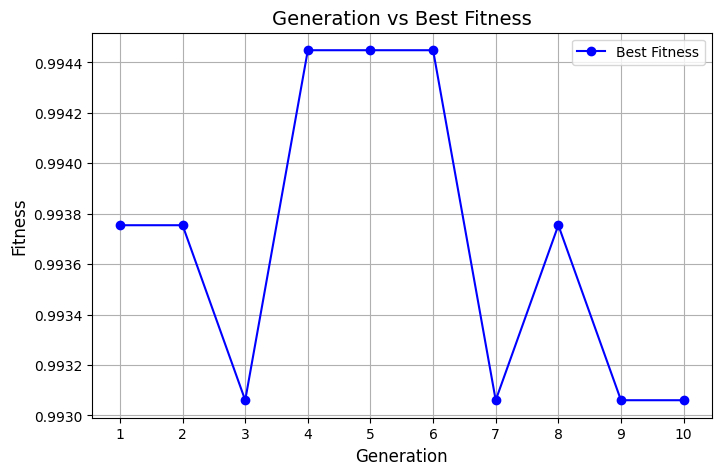

In [ ]:
# Load and preprocess dataset
ds = pd.read_csv("HT_SelectedFeatures_KW.csv")
ds = shuffle(ds, random_state=42)

X = ds.drop(columns=['Label'])
y = ds['Label']

scalers = ['qt']
learners = ["xgb"]

results = []
for scaler in scalers:
  for learner in learners:
    qga = QGA_TTS_New(X, y, n_of_pop=10, n_of_gen=10, scaler=scaler, learner=learner)
    Q = qga.run_gen_0()
    best_indi, best_accuracy, best_auc, best_precision, best_f1_score, best_recall, best_sensitivity, best_specificity, best_num_features = qga.run_qga(Q[0])
    new_dataset = qga.build_new_dataset(best_indi)
    feature_names = new_dataset.columns.tolist()

    result = {
        "Scaler": scaler,
        "Learner": learner,
        "Accuracy": best_accuracy,
        "AUC": best_auc,
        "Precision": best_precision,
        "F1 Score": best_f1_score,
        "Recall": best_recall,
        "Sensitivity": best_sensitivity,
        "Specificity": best_specificity,
        "Number of Features": best_num_features,
        "Feature Names": feature_names
    }
    results.append(result)

df = pd.DataFrame(results)
df.to_csv("QIEA_HT_Results.csv", index=False)
